# Analysis Plots (See results notebook for interpretation)

## Imports

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import ast
import plotly.express as px
import mpld3

# Color codes to use : 
#95a3c3
#e99675
#72b6a1
#db96c0

In [4]:
#Import data
folder = "generated/"
df_movies=pd.read_csv(folder + "final_movie_dataset.csv", index_col = 'Wikipedia movie ID')

#Add a column that has the decades
df_movies['decade'] = (df_movies['Movie release year'] // 10) * 10

#Add a column that has the seasons
def month_to_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
df_movies['season'] = df_movies['Movie release month'].apply(month_to_season)

#Add a column that has the release days
df_movies['Movie release date'] = pd.to_datetime(df_movies['Movie release date'], errors='coerce')
df_movies['Movie release day'] = df_movies['Movie release date'].dt.day

df_movies.sample(1)

Movie name  Movie release month  \
Wikipedia movie ID                                             
24156927            The Surgeon's Knife                 10.0   

                    Movie release year Movie release date  \
Wikipedia movie ID                                          
24156927                        1957.0         1957-10-01   

                    Movie box office revenue  Movie runtime Movie languages  \
Wikipedia movie ID                                                            
24156927                                 NaN           84.0     ['English']   

                       Movie countries  \
Wikipedia movie ID                       
24156927            ['United Kingdom']   

                                                         Movie genres  \
Wikipedia movie ID                                                      
24156927            ['Crime Fiction', 'Crime Thriller', 'Melodrama...   

                                                              Summary  \
Wikipedia movie ID                                                      
24156927            A doctor becomes the victim of extortionists w...   

                   Sentiment  Compound Score         Theme  vote_average  \
Wikipedia movie ID                                                         
24156927            negative         -0.5106  Manipulation           NaN   

                    budget  decade season  Movie release day  
Wikipedia movie ID                                            
24156927               NaN  1950.0   Fall                1.0

In [5]:
#Add a column with the release day
df_movies['Movie release date'] = pd.to_datetime(df_movies['Movie release date'], errors='coerce')
df_movies['Movie release day'] = df_movies['Movie release date'].dt.day

In [6]:
#Check how many NaN's in each column
df_movies.isna().sum()

Movie name                      0
Movie release month         21171
Movie release year           6834
Movie release date          21171
Movie box office revenue    70535
Movie runtime               20379
Movie languages                 0
Movie countries                 0
Movie genres                    0
Summary                     19378
Sentiment                   19378
Compound Score              19378
Theme                       19605
vote_average                39682
budget                      73232
decade                       6834
season                      21171
Movie release day           21171
dtype: int64

## Data Selection

In [8]:
#Filter df to only keep USA movies and non-nan rows in budget, release year and runtime
df_filtered = df_movies.dropna(subset=['budget', 'Movie box office revenue','Movie release year','Movie runtime'])
df_filtered = df_filtered[df_filtered['Movie countries'].apply(lambda x: 'United States of America' in x)]

#Add profitability metric (box office / budget)
df_filtered['profitability'] = df_filtered['Movie box office revenue']/df_filtered['budget']

#Remove big outliers for better visualization and generalization and small/no budget movies
df_filtered = df_filtered[df_filtered['profitability'] < 15]
df_filtered = df_filtered[df_filtered['budget'] > 10000] 

#Get 1 genre per row
df_filtered['Movie genres'] = df_filtered['Movie genres'].apply(ast.literal_eval)
df_exploded = df_filtered.explode('Movie genres')



In [9]:
#create df with 1 genre per row and filter to keep only USA movies
df_movies['Movie genres'] = df_movies['Movie genres'].apply(ast.literal_eval)

df_genres = df_movies.explode('Movie genres')
df_genres = df_genres.dropna(subset=['Movie release year','Movie runtime','Movie genres'])
df_genres = df_genres[df_genres['Movie countries'].apply(lambda x: 'United States of America' in x)]

In [10]:
#df with all non NaN runtimes and years
df_runtime = df_movies.dropna(subset=['Movie release year','Movie runtime'])
df_runtime = df_runtime[df_runtime['Movie countries'].apply(lambda x: 'United States of America' in x)]

In [11]:
#df with all non NaN release times
df_release = df_movies.dropna(subset=['Movie release year','Movie runtime'])
df_release = df_release[df_release['Movie countries'].apply(lambda x: 'United States of America' in x)]

In [12]:
#df with all non NaN themes
df_theme = df_movies.dropna(subset=['Movie release year','Theme'])
df_theme = df_theme[df_theme['Movie countries'].apply(lambda x: 'United States of America' in x)]

In [13]:
#Number of movies remaining for our study 
print(df_filtered.shape)
print(df_genres.shape)

(4683, 19)
(115075, 18)


In [14]:
#Get the top 10 themes
top_10_themes = df_filtered['Theme'].value_counts().sort_values(ascending=False).head(15)
#print(top_10_themes)

#Define the 6 genres we will study, regrouping all related genres
family_genres = ["Children's/Family",'Family Film','Family-Oriented Adventure','Family Drama','Family & Personal Relationships',"Children's"]
war_genres = ['War film', 'Combat films', 'Anti-War film', 'Gulf War', 'Cold War', 'Nuclear warfare', 'War effort', 'Anti-war']
romantic_genres = ['Romantic thriller','Romantic fantasy','Romantic drama','Romantic comedy']
lgbt_genres = ['LGBT', 'Gay Interest', 'New Queer Cinema', 'Gay Themed', 'Queer Cinema','Gender Issues','Gay']
action_genres = ['Action','Action/Adventure','Action Thrillers','Action Comedy']
hero_genres = ['Superhero', 'Superhero movie']

#List of genres we will study
genres_list = ['Family','War','Romantic','LGBT','Action','Superhero']

In [15]:
#Rename the movie genres related to the general genres we will study
df_exploded['Movie genres'] = df_exploded['Movie genres'].replace(family_genres, 'Family') #1048
df_exploded['Movie genres'] = df_exploded['Movie genres'].replace(war_genres, 'War') #250
df_exploded['Movie genres'] = df_exploded['Movie genres'].replace(romantic_genres, 'Romantic') #908
df_exploded['Movie genres'] = df_exploded['Movie genres'].replace(lgbt_genres, 'LGBT') #233
df_exploded['Movie genres'] = df_exploded['Movie genres'].replace(action_genres, 'Action') #2396
df_exploded['Movie genres'] = df_exploded['Movie genres'].replace(hero_genres, 'Superhero') #149

df_genres['Movie genres'] = df_genres['Movie genres'].replace(family_genres, 'Family') #1048
df_genres['Movie genres'] = df_genres['Movie genres'].replace(war_genres, 'War') #250
df_genres['Movie genres'] = df_genres['Movie genres'].replace(romantic_genres, 'Romantic') #908
df_genres['Movie genres'] = df_genres['Movie genres'].replace(lgbt_genres, 'LGBT') #233
df_genres['Movie genres'] = df_genres['Movie genres'].replace(action_genres, 'Action') #2396
df_genres['Movie genres'] = df_genres['Movie genres'].replace(hero_genres, 'Superhero') #149

In [16]:
#Check sample sizes
df_exploded[df_exploded['Movie genres'] == 'Family'].shape

(1048, 19)

## Does the analysis matter?

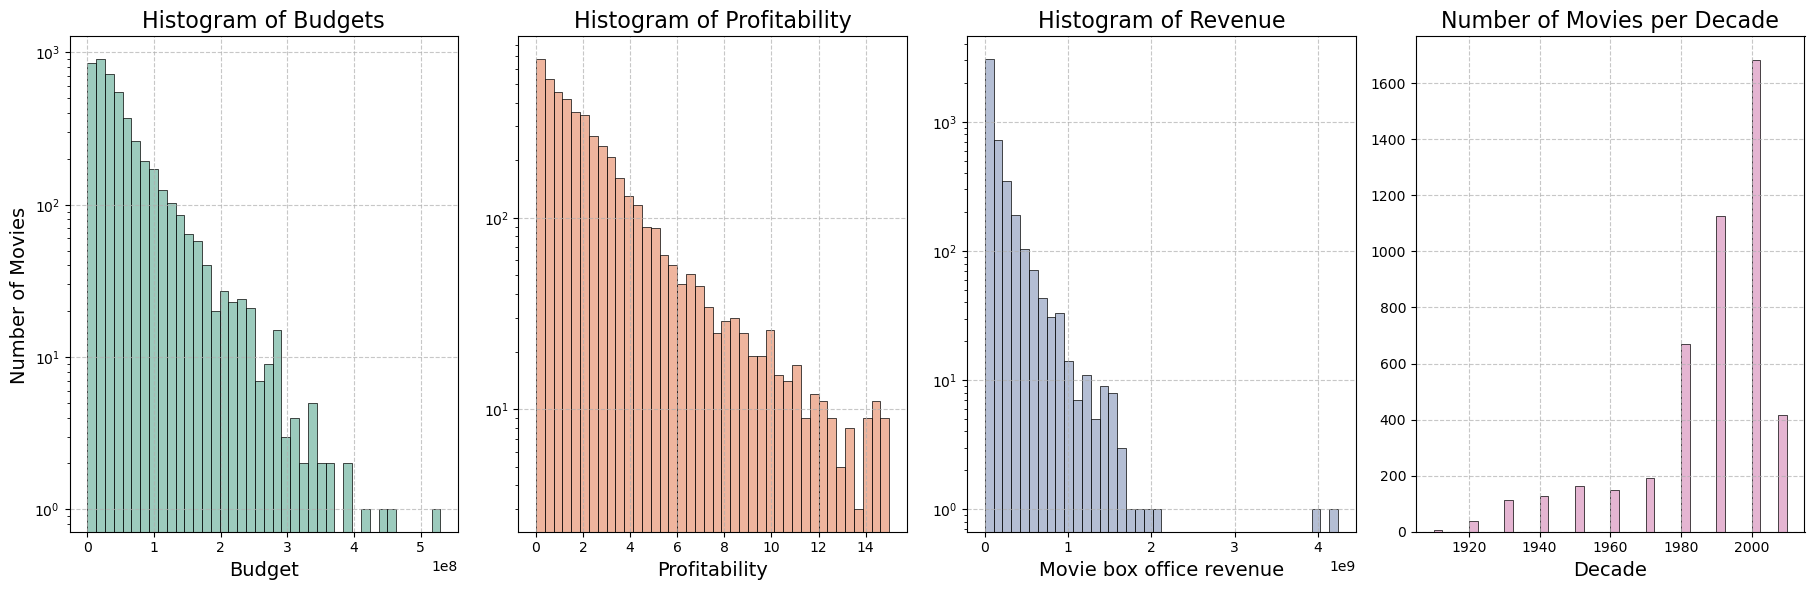

In [18]:
#plot histogram of budgets, profitability, revenue and number of movies per decade

#Create figure
fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=False)

#Define info and data of interest for our 4 plots 
variables = ['budget', 'profitability', 'Movie box office revenue', 'decade']
titles = ["Histogram of Budgets", "Histogram of Profitability", "Histogram of Revenue", "Number of Movies per Decade"]
colors = ['#72b6a1', '#e99675', '#95a3c3', '#db96c0']

#Plot all 4 histograms with a loop
for i, (ax, var, title, color) in enumerate(zip(axes, variables, titles, colors)):
    sns.histplot(data=df_filtered, x=var, bins=40, kde=False, color=color, alpha=0.7, ax=ax)
    
    if i < 3:  # Set y-axis to log scale for plots 1, 2 and 3
        ax.set_yscale('log')
    
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(var.capitalize(), fontsize=14)
    ax.set_ylabel("", fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.7)
    
fig.text(0.0, 0.5, 'Number of Movies', ha='center', va='center', rotation='vertical', fontsize=14)
plt.tight_layout()
plt.savefig('visuals/1.png', bbox_inches='tight')
plt.show()

#Distribution not normal -> we prefer using the median values rather than mean in the following except when the sample size is too small.

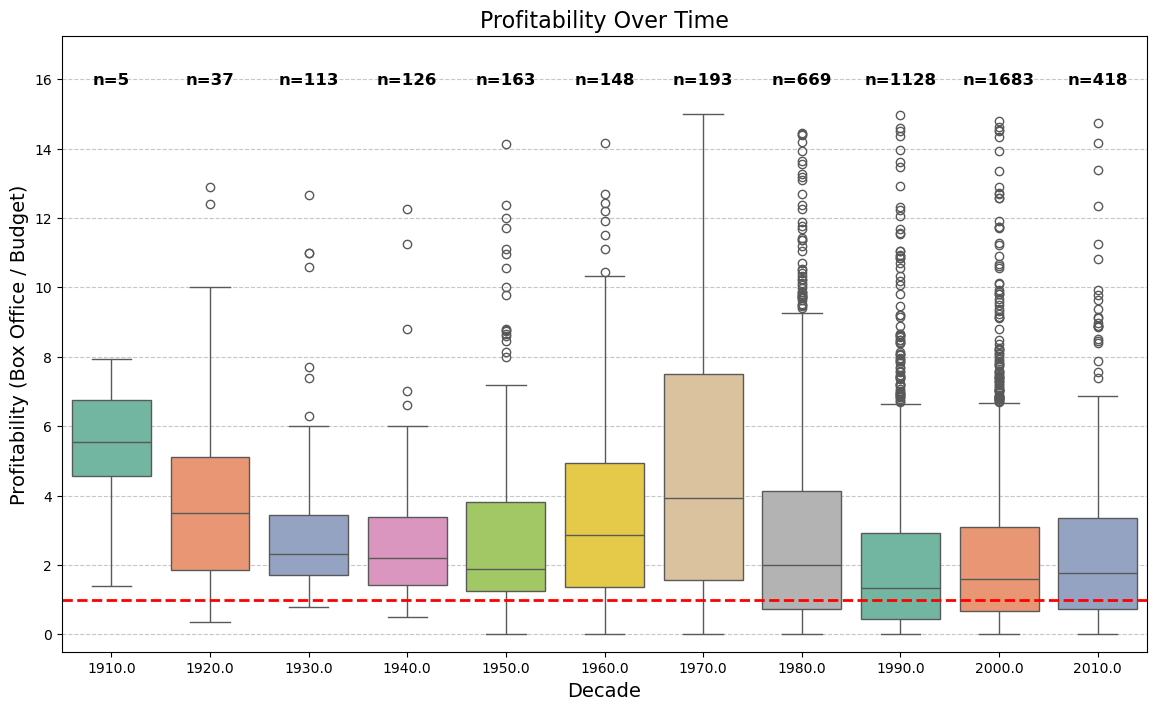

In [19]:
#Boxplot of profitability over time (decade) to see the evolution

#Plot the boxplots
plt.figure(figsize=(14, 8))

sns.boxplot(x="decade",y="profitability",data=df_filtered,legend = False,hue = "decade",palette="Set2")
plt.title("Profitability Over Time", fontsize=16)
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Profitability (Box Office / Budget)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Add sample count on top
#Positioning of the text
ax = plt.gca()
y_max = df_filtered['profitability'].max()
y_min = df_filtered['profitability'].min() 
y_range = y_max - y_min

counts = df_filtered['decade'].value_counts().sort_index() #number of movies per decade
for i, decade in enumerate(sorted(counts.index)):
    count = counts[decade]
    ax.text(i, y_max + 0.05 * y_range, f'n={count}', ha='center', va='bottom',fontsize=12,fontweight='bold')

#Profitability treshhold at y = 1
plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label='y=1')

#Fix Y axis range for better visualization
plt.ylim(y_min-0.5, y_max + 0.15 * y_range)
plt.savefig('visuals/2.png', bbox_inches='tight')
plt.show()

#Movies less profitable now than in the past, many even don't turn a profit, we will investigate further...

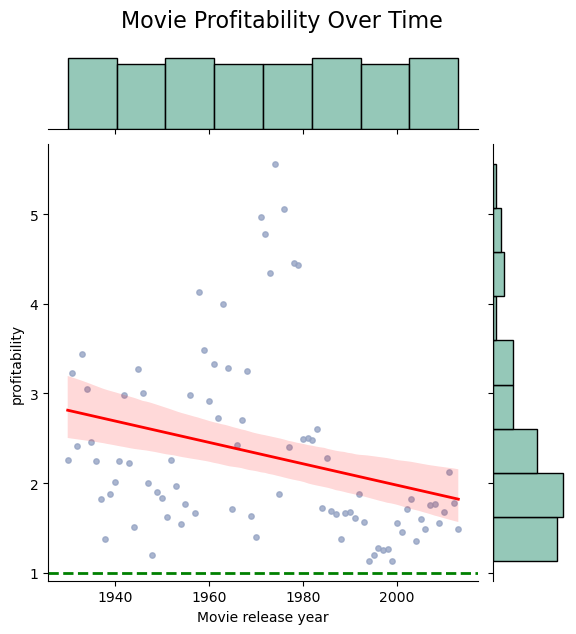

In [20]:
# Confirm the trend with a regression to see if there is a decreasing tendency. 

#Filter to analyze 1930 onwards
df_prof = df_filtered[df_filtered['decade'] > 1929] 

#compute the median profitability for each year: 
#Due to the lack of data in the earlier years, as we want each year to weight equally. 
df_prof_grouped = df_prof.groupby('Movie release year')['profitability'].median().reset_index()

plot = sns.jointplot(x=df_prof_grouped['Movie release year'], y=df_prof_grouped['profitability'], kind="reg",color='#95a3c3',height=6,ratio=5, scatter_kws={'s': 15},line_kws={'color': 'red', 'linewidth': 2},
                     marginal_kws={'kde': False, 'color':'#72b6a1'})

plot.ax_joint.axhline(1, color='green', linestyle='--', linewidth=2)
plot.fig.suptitle("Movie Profitability Over Time", fontsize=16, y=1.05)

plt.savefig('visuals/3.png', bbox_inches='tight')


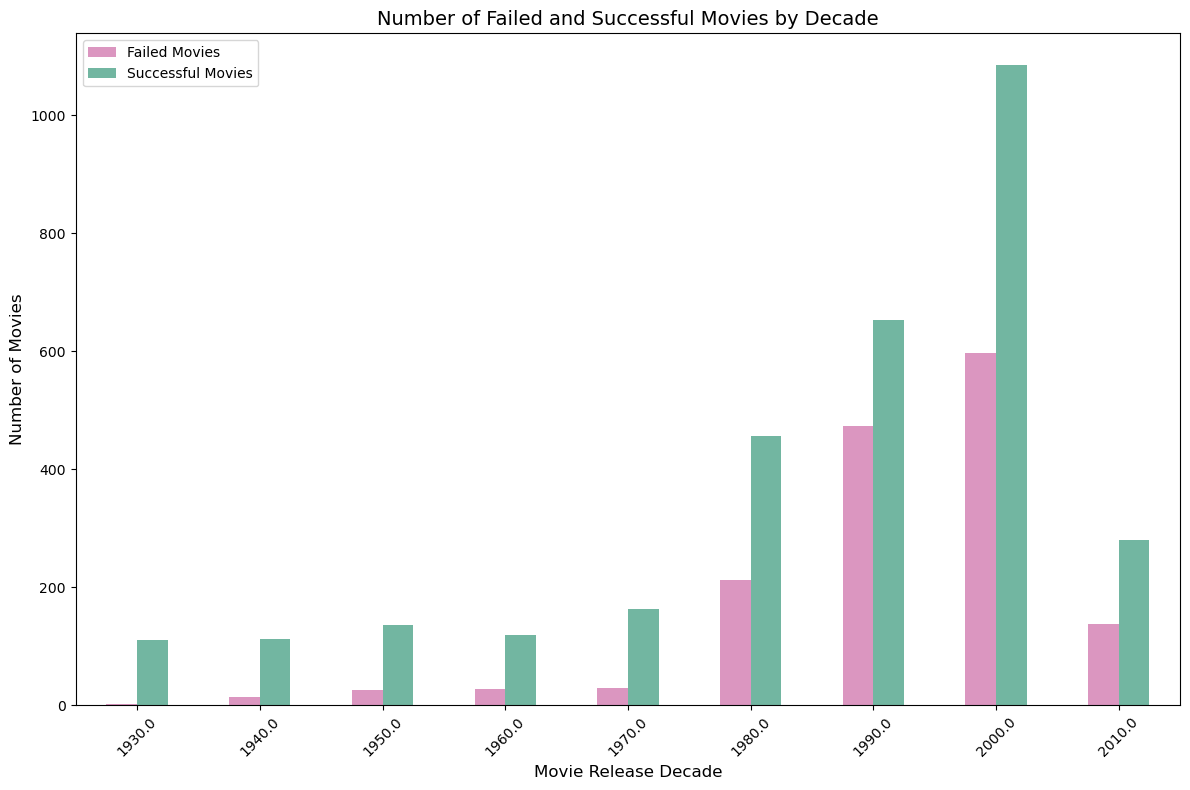

In [21]:
#Add the movie success rate to the dataframe (100 if movie turned a profit, else 0)
df_filtered['success rate'] = np.where(df_filtered['profitability'] > 1, 100, 0)
df_rate_decade = df_filtered[df_filtered['decade'] > 1920]

#Sample count of failed and successful movies per decade
movies_by_decade = df_rate_decade.groupby(['decade', 'success rate']).size().reset_index(name='count')

#Prepare plot data
movies_pivot = movies_by_decade.pivot(index='decade', columns='success rate', values='count').fillna(0)
movies_pivot.columns = ['Failed Movies', 'Successful Movies']

#Barplot
movies_pivot.plot(kind='bar', stacked=False, color=['#db96c0', '#72b6a1'], figsize=(12, 8))

plt.title("Number of Failed and Successful Movies by Decade", fontsize=14)
plt.xlabel("Movie Release Decade", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.savefig('visuals/4.png', bbox_inches='tight')
plt.show()


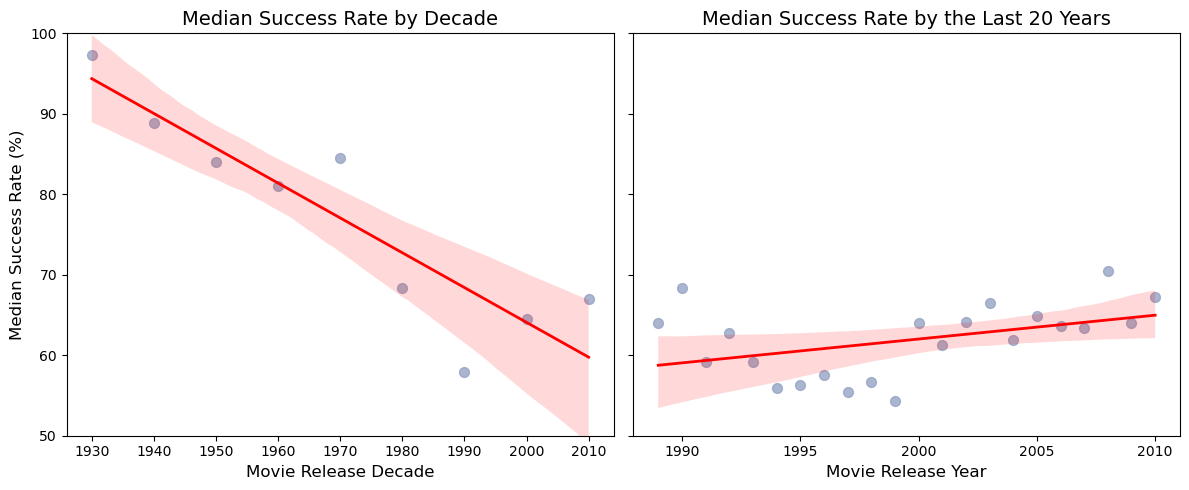

In [22]:
#Regression plot with scatter points and 95% confidence interval showing how the percentage of 
#profitable movies changed over time, for the last 100 and 20 years. 

#Filtering profitability data by decade, as very few data from 100 years ago it gives more samples to compute a meaningful medians/means. 
#profitability data
df_rate_decade = df_filtered[df_filtered['decade'] > 1920]
median_rate_by_decade = df_rate_decade.groupby('decade')['success rate'].mean().reset_index()

#Filter and aggregate success rate data by year for the last 20 years
df_rate_year = df_filtered[(df_filtered['Movie release year'] > 1988) & 
                           (df_filtered['Movie release year'] < 2011)]
median_rate_by_year = df_rate_year.groupby('Movie release year')['success rate'].mean().reset_index()

#plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

#Plot 1: Average success rate by decade
sns.regplot(x=median_rate_by_decade['decade'], y=median_rate_by_decade['success rate'], ax=axes[0],
            color='#95a3c3', scatter_kws={'s': 50}, line_kws={'color': 'red', 'linewidth': 2})
axes[0].set_title("Median Success Rate by Decade", fontsize=14)
axes[0].set_xlabel("Movie Release Decade", fontsize=12)
axes[0].set_ylabel("Median Success Rate (%)", fontsize=12)
axes[0].set_ylim(50, 100)

#Plot 2: Average success rate by year
sns.regplot(x=median_rate_by_year['Movie release year'], y=median_rate_by_year['success rate'], ax=axes[1],
            color='#95a3c3', scatter_kws={'s': 50}, line_kws={'color': 'red', 'linewidth': 2})
axes[1].set_title("Median Success Rate by the Last 20 Years", fontsize=14)
axes[1].set_xlabel("Movie Release Year", fontsize=12)
axes[1].set_ylabel("")
axes[1].set_ylim(50, 100)

plt.tight_layout()
plt.savefig('visuals/5.png', bbox_inches='tight')
plt.show()


## Hypothesis 1 : higher budget movies are a higher risk and are less likely to be profitable. 

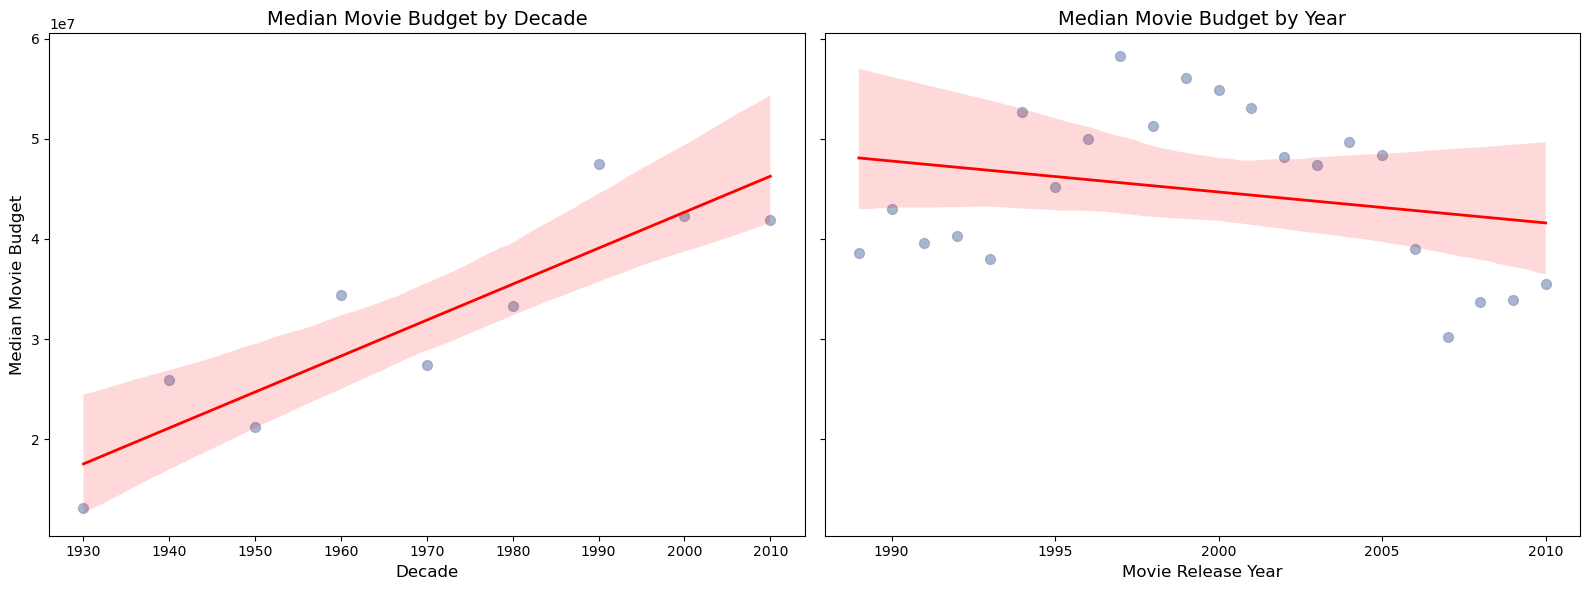

In [24]:
#Plot of budget over time

#Filter to get the data from 1930 onwards and remove outliers for better visualization
#df_budget_decade = df_budget_decade[df_budget_decade['budget'] < 300000000]
df_budget_decade = df_filtered[df_filtered['decade'] > 1929]

#Group by decade and calculate the median runtime
median_budget_per_decade = df_budget_decade.groupby('decade')['budget'].median().reset_index()

#Filter to get the data from the last 20 years as the sample size is bigger, therefore we can see how budgets evolved more recently.
df_budget_year = df_filtered[df_filtered['Movie release year'] > 1988]
df_budget_year = df_budget_year[df_budget_year['Movie release year'] < 2011]

#Group by release year and calculate the median runtime
median_budget_per_year = df_budget_year.groupby('Movie release year')['budget'].median().reset_index()

#Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

#Plot 1: Regression on median runtime by decade
sns.regplot(x=median_budget_per_decade['decade'], y=median_budget_per_decade['budget'], ax=axes[0], color='#95a3c3', scatter_kws={'s': 50}, 
            line_kws={'color': 'red', 'linewidth': 2})

axes[0].set_title("Median Movie Budget by Decade", fontsize=14)
axes[0].set_xlabel("Decade", fontsize=12)
axes[0].set_ylabel("Median Movie Budget", fontsize=12)

# Plot 2: Regression on median runtime by release year
sns.regplot(
    x=median_budget_per_year['Movie release year'], 
    y=median_budget_per_year['budget'], 
    ax=axes[1],
    color='#95a3c3', 
    scatter_kws={'s': 50}, 
    line_kws={'color': 'red', 'linewidth': 2}
)
axes[1].set_title("Median Movie Budget by Year", fontsize=14)
axes[1].set_xlabel("Movie Release Year", fontsize=12)
axes[1].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.savefig('visuals/6.png', bbox_inches='tight')
plt.show()

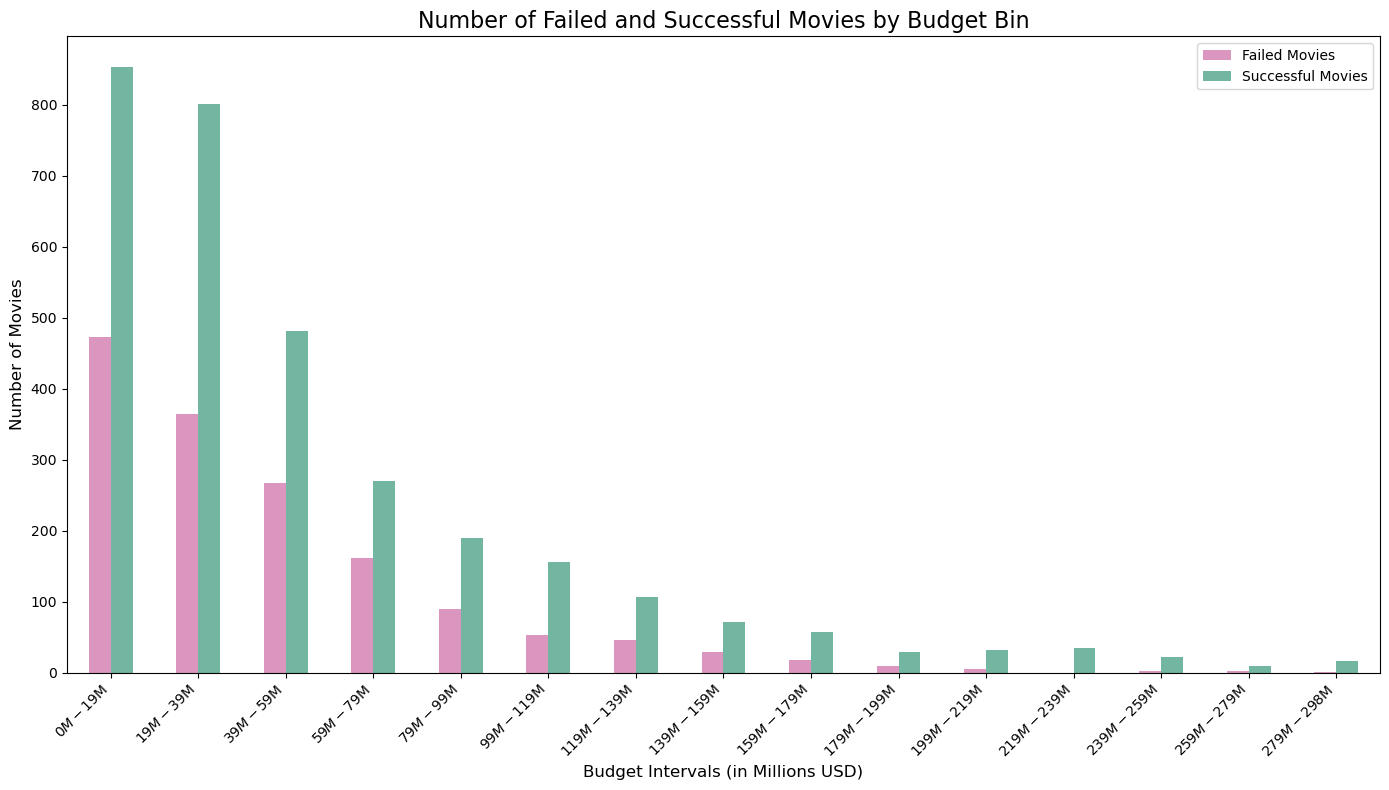

In [25]:
#Barplot for a range of budget the number of failed and successful movies

df_bud = df_filtered[df_filtered['budget'] < 300000000]

#Create bins of budgets as it's a continuous value
budget_bins = pd.cut(df_bud['budget'], bins=15)

#Bin labels for plot
budget_bin_labels = [f"${int(interval.left/1e6):,}M - ${int(interval.right/1e6):,}M" for interval in budget_bins.cat.categories]

#Get number of failed and successful movies per bin
movies_by_budget_bin = df_filtered.groupby([budget_bins, 'success rate'],observed=False).size().reset_index(name='count')

#Prepare data for plotting
movies_pivot_budget = movies_by_budget_bin.pivot(index='budget', columns='success rate', values='count').fillna(0)
movies_pivot_budget.columns = ['Failed Movies', 'Successful Movies']

#Update indices with labels
movies_pivot_budget.index = budget_bin_labels

#Plotting
movies_pivot_budget.plot(kind='bar', stacked=False, color=['#db96c0', '#72b6a1'], figsize=(14, 8))

plt.title("Number of Failed and Successful Movies by Budget Bin", fontsize=16)
plt.xlabel("Budget Intervals (in Millions USD)", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.savefig('visuals/7.png', bbox_inches='tight')
plt.show()


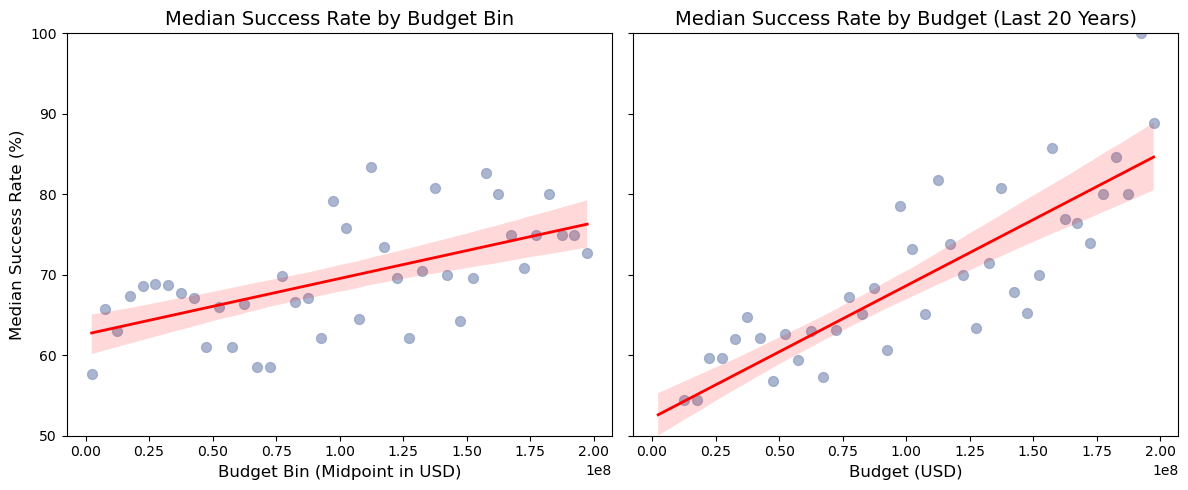

In [26]:
#Do higher budget movies fail more? 

#Remove outliers 
df_bud_old = df_filtered[df_filtered['budget'] < 200000000]

#Visualize trend over a longer period
df_bud_old = df_bud_old[df_bud_old['decade'] > 1929]

#Create bins of budgets as it's a continuous value
budget_bins_old = pd.cut(df_bud_old['budget'], bins=40)

rate_bin_old = df_bud_old.groupby(budget_bins_old, observed=False)['success rate'].mean().reset_index(name='success rate')
rate_bin_old['Budget Midpoint'] = rate_bin_old['budget'].apply(lambda x: x.mid)


#Remove outliers 
df_bud_new = df_filtered[df_filtered['budget'] < 200000000]

#Visualize trend over a longer period
df_bud_new = df_bud_new[df_bud_new['decade'] > 1989]

#Create bins of budgets as it's a continuous value
budget_bins_new = pd.cut(df_bud_new['budget'], bins=40)

rate_bin_new = df_bud_new.groupby(budget_bins_new, observed=False)['success rate'].mean().reset_index(name='success rate')
rate_bin_new['Budget Midpoint'] = rate_bin_new['budget'].apply(lambda x: x.mid)



#Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

#Plot 1: Average success rate by budget (all decades)
sns.regplot(x=rate_bin_old['Budget Midpoint'], 
            y=rate_bin_old['success rate'], 
            ax=axes[0], color='#95a3c3', scatter_kws={'s': 50}, line_kws={'color': 'red', 'linewidth': 2})
axes[0].set_title("Median Success Rate by Budget Bin", fontsize=14)
axes[0].set_xlabel("Budget Bin (Midpoint in USD)", fontsize=12)
axes[0].set_ylabel("Median Success Rate (%)", fontsize=12)
axes[0].set_ylim(50, 100)

#Plot 2: Average success rate by budget (last 20 years)
sns.regplot(x=rate_bin_new['Budget Midpoint'], 
            y=rate_bin_new['success rate'], 
            ax=axes[1], color='#95a3c3', scatter_kws={'s': 50}, line_kws={'color': 'red', 'linewidth': 2})
axes[1].set_title("Median Success Rate by Budget (Last 20 Years)", fontsize=14)
axes[1].set_xlabel("Budget (USD)", fontsize=12)
axes[1].set_ylabel("")
axes[1].set_ylim(50, 100)

plt.tight_layout()
plt.savefig('visuals/8.png', bbox_inches='tight')
plt.show()

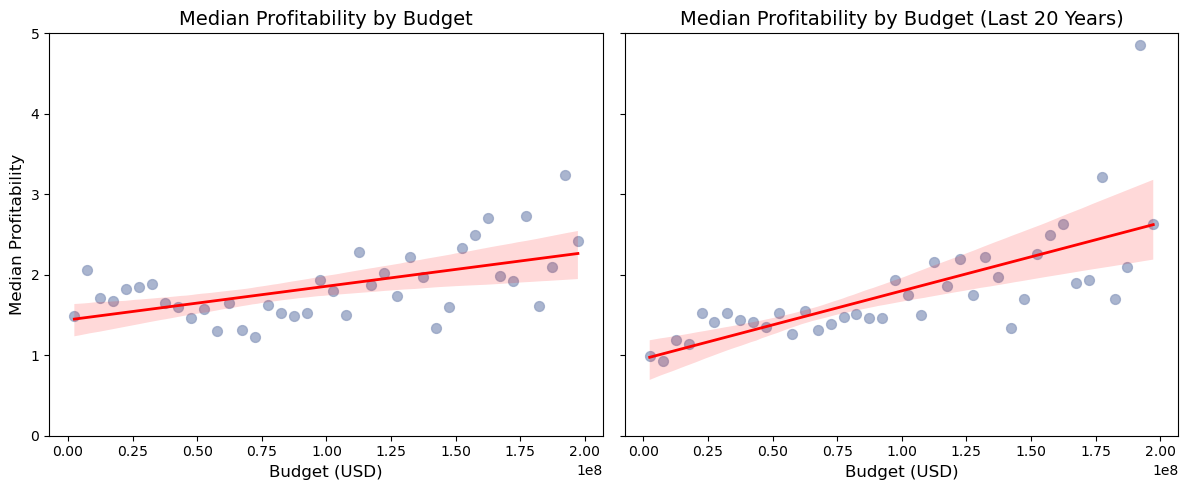

In [27]:
#How does profitability relate to budget? 

#Remove outliers 
df_bud_old = df_filtered[df_filtered['budget'] < 200000000]

#Visualize trend over a longer period
df_bud_old = df_bud_old[df_bud_old['decade'] > 1929]

#Create bins of budgets as it's a continuous value
budget_bins_old = pd.cut(df_bud_old['budget'], bins=40)

rate_bin_old = df_bud_old.groupby(budget_bins_old, observed=False)['profitability'].median().reset_index(name='median profitability')
rate_bin_old['Budget Midpoint'] = rate_bin_old['budget'].apply(lambda x: x.mid)



#Remove outliers 
df_bud_new = df_filtered[df_filtered['budget'] < 200000000]

#Visualize trend over a longer period
df_bud_new = df_bud_new[df_bud_new['decade'] > 1989]

#Create bins of budgets as it's a continuous value
budget_bins_new = pd.cut(df_bud_new['budget'], bins=40)

rate_bin_new = df_bud_new.groupby(budget_bins_new, observed=False)['profitability'].median().reset_index(name='median profitability')
rate_bin_new['Budget Midpoint'] = rate_bin_new['budget'].apply(lambda x: x.mid)



#Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

#Plot 1: Median profitability by budget (all decades)
sns.regplot(x=rate_bin_old['Budget Midpoint'], 
            y=rate_bin_old['median profitability'], 
            ax=axes[0], color='#95a3c3', scatter_kws={'s': 50}, line_kws={'color': 'red', 'linewidth': 2})
axes[0].set_title("Median Profitability by Budget", fontsize=14)
axes[0].set_xlabel("Budget (USD)", fontsize=12)
axes[0].set_ylabel("Median Profitability", fontsize=12)
axes[0].set_ylim(0, 5)

#Plot 2: Median profitability by budget (last 20 years)
sns.regplot(x=rate_bin_new['Budget Midpoint'], 
            y=rate_bin_new['median profitability'], 
            ax=axes[1], color='#95a3c3', scatter_kws={'s': 50}, line_kws={'color': 'red', 'linewidth': 2})
axes[1].set_title("Median Profitability by Budget (Last 20 Years)", fontsize=14)
axes[1].set_xlabel("Budget (USD)", fontsize=12)
axes[1].set_ylabel("")
axes[1].set_ylim(0, 5)

plt.tight_layout()
plt.savefig('visuals/9.png', bbox_inches='tight')
plt.show()

## Hypothesis 2: Does movie runtime influence revenue?

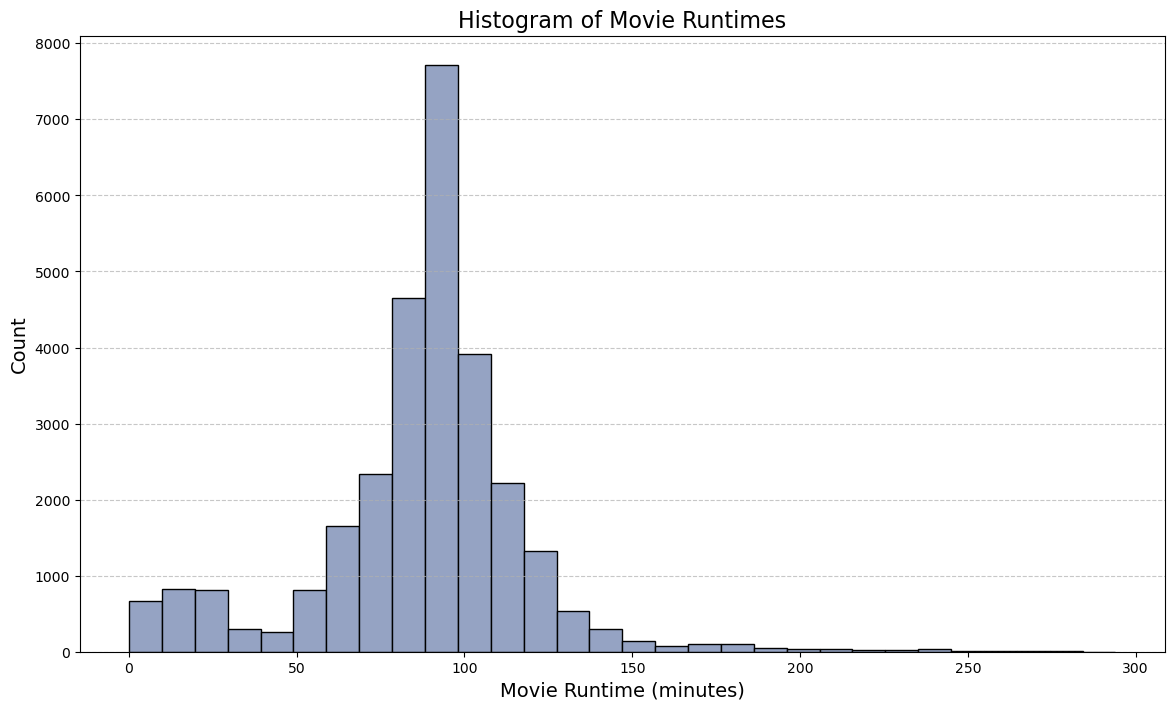

In [29]:
#Histogram of runtimes (we use the dataset with the most data : which include NaN budget/revenues)

#remove outliers for better visualisation
df_run = df_runtime[df_runtime['Movie runtime'] < 300] 
#df_run = df_run[df_run['decade'] > 1929]

#Plotting
plt.figure(figsize=(14, 8))
plt.hist(df_run['Movie runtime'], bins=30, color='#95a3c3', edgecolor='black')

plt.title("Histogram of Movie Runtimes", fontsize=16)
plt.xlabel("Movie Runtime (minutes)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and show the plot
plt.savefig('visuals/10.png', bbox_inches='tight')
plt.show()

#Normally distributed around 1h30 mark +-

(28980, 18)


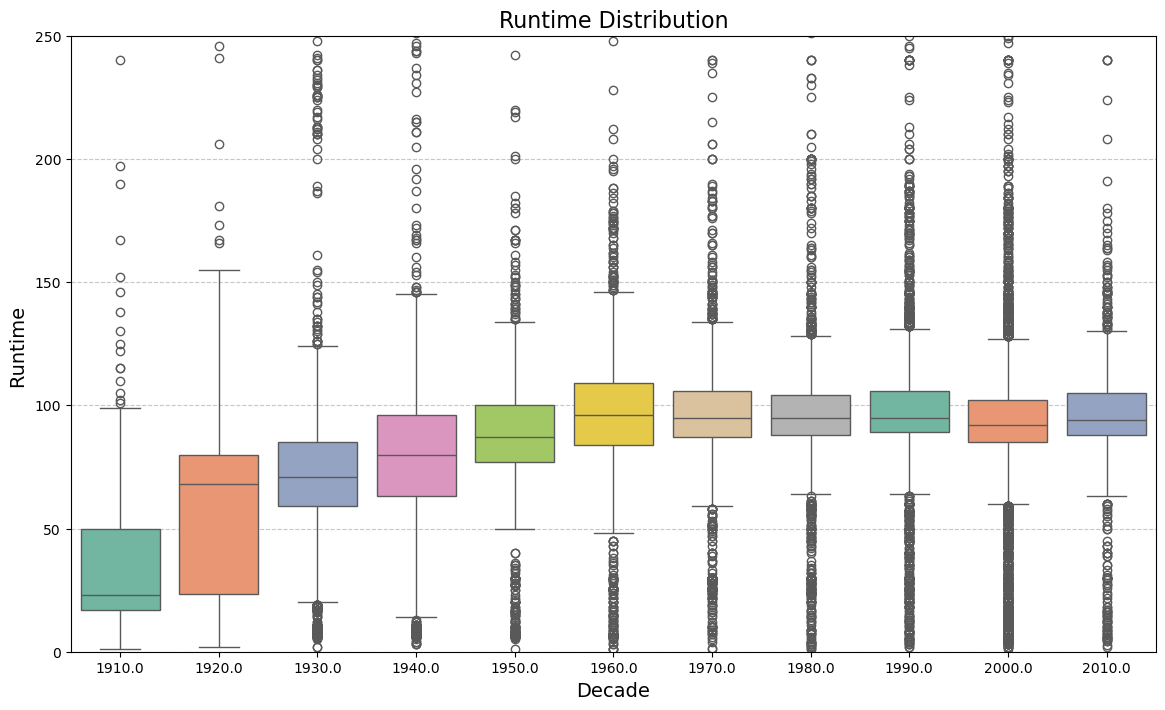

In [30]:
#Boxplot of runtimes for each decade
#We still use the extended dataset

df_filtered['decade'] = df_filtered['decade'].astype(int)

#Filter for better visualisation
df_run = df_runtime[df_runtime['decade'] > 1909]

print(df_run.shape)

#Plotting
plt.figure(figsize=(14, 8))
sns.boxplot(x="decade", y="Movie runtime", data=df_run, legend = False, hue = "decade", palette="Set2")

plt.title("Runtime Distribution", fontsize=16)
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Runtime ", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 250)

plt.savefig('visuals/11.png', bbox_inches='tight')
plt.show()


(20146, 18)


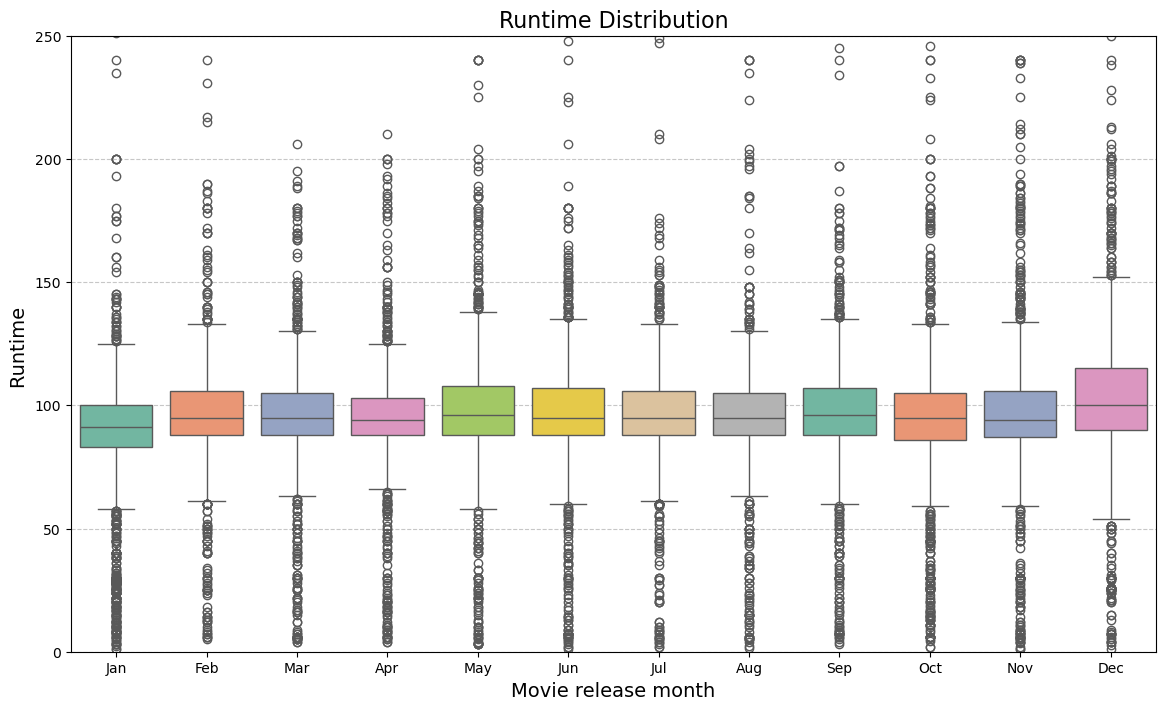

In [31]:
#Boxplot of runtimes for each decade
#We still use the extended dataset

df_filtered['decade'] = df_filtered['decade'].astype(int)

#Filter for better visualisation
df_run = df_runtime[df_runtime['decade'] > 1959]

print(df_run.shape)

#Plotting
plt.figure(figsize=(14, 8))
sns.boxplot(x="Movie release month", y="Movie runtime", data=df_run, legend = False, hue = "Movie release month", palette="Set2")

plt.title("Runtime Distribution", fontsize=16)
plt.xlabel("Movie release month", fontsize=14)
plt.ylabel("Runtime ", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 250)

month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(ticks=np.linspace(0,11,12), labels=month_names)

plt.savefig('visuals/12.png', bbox_inches='tight')
plt.show()

#constant runtime through time, except in the 60s. She keeps it in mind to investigate later...

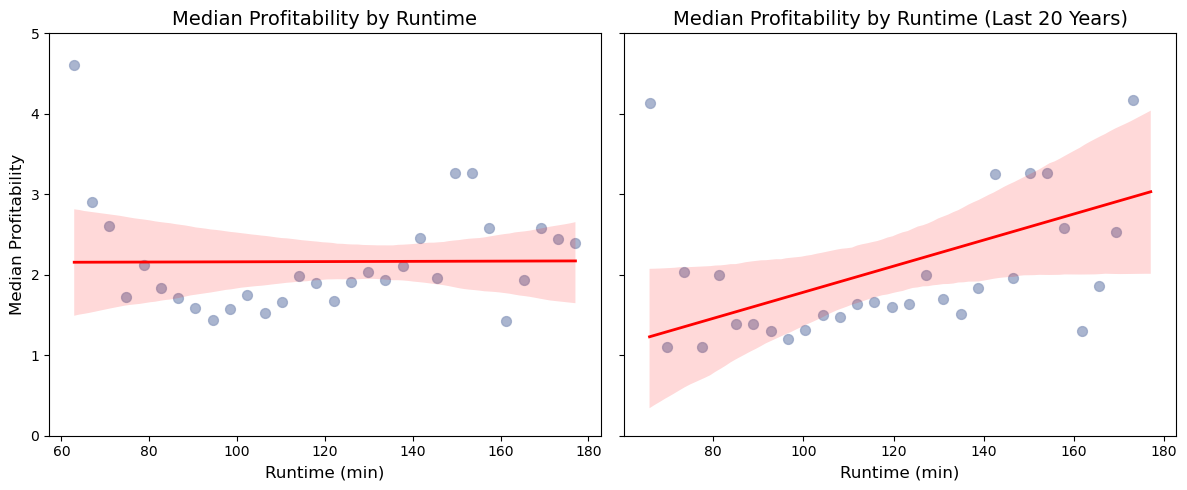

In [32]:
#How does profitability relate to runtime? 

#Filter range with the most datapoints (which is considered a classic movie length)
df_run_old = df_filtered[df_filtered['Movie runtime'] < 180]
df_run_old = df_run_old[df_run_old['Movie runtime'] > 60]

#Visualize trend over a longer period
df_run_old = df_run_old[df_run_old['decade'] > 1929]

#Create bins of runtimes as it's a continuous value
runtime_bins_old = pd.cut(df_run_old['Movie runtime'], bins=30)

rate_bin_old = df_run_old.groupby(runtime_bins_old, observed=False)['profitability'].median().reset_index(name='median profitability')
rate_bin_old['Runtime Midpoint'] = rate_bin_old['Movie runtime'].apply(lambda x: x.mid)


#Filter range with the most datapoints (which is considered a classic movie length)
df_run_new = df_filtered[df_filtered['Movie runtime'] < 180]
df_run_new = df_run_new[df_run_new['Movie runtime'] > 60]

#Visualize trend over a shorter period
df_run_new = df_run_new[df_run_new['decade'] > 1989]

#Create bins of runtimes as it's a continuous value
runtime_bins_new = pd.cut(df_run_new['Movie runtime'], bins=30)

rate_bin_new = df_run_new.groupby(runtime_bins_new, observed=False)['profitability'].median().reset_index(name='median profitability')
rate_bin_new['Runtime Midpoint'] = rate_bin_new['Movie runtime'].apply(lambda x: x.mid)



#Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

#Plot 1: Median budget by runtime (all decades)
sns.regplot(x=rate_bin_old['Runtime Midpoint'], 
            y=rate_bin_old['median profitability'], 
            ax=axes[0], color='#95a3c3', scatter_kws={'s': 50}, line_kws={'color': 'red', 'linewidth': 2})
axes[0].set_title("Median Profitability by Runtime", fontsize=14)
axes[0].set_xlabel("Runtime (min)", fontsize=12)
axes[0].set_ylabel("Median Profitability", fontsize=12)
axes[0].set_ylim(0, 5)

#Plot 2: Median budget by runtime (last 20 years)
sns.regplot(x=rate_bin_new['Runtime Midpoint'], 
            y=rate_bin_new['median profitability'], 
            ax=axes[1], color='#95a3c3', scatter_kws={'s': 50}, line_kws={'color': 'red', 'linewidth': 2})
axes[1].set_title("Median Profitability by Runtime (Last 20 Years)", fontsize=14)
axes[1].set_xlabel("Runtime (min)", fontsize=12)
axes[1].set_ylabel("")
axes[1].set_ylim(0, 5)

plt.tight_layout()
plt.savefig('visuals/13.png', bbox_inches='tight')
plt.show()

## Hypothesis 3: what is the most profitable release period?


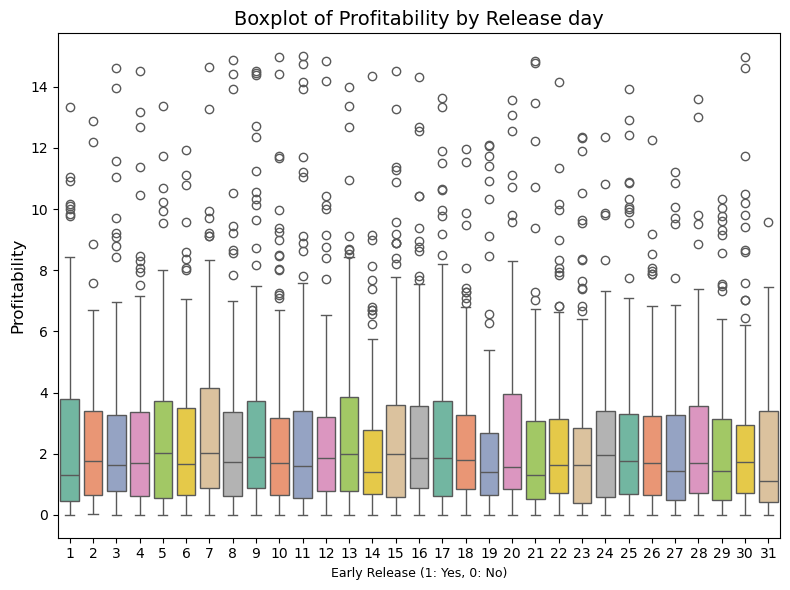

In [35]:
#Does when you release movies within a month have an impact on profitability?
#Boxplot of profitability on release day

#Add a "day" column and look from 1950 onwards
df_filtered['Movie release day'] = df_filtered['Movie release day'].astype(int)
df_prof = df_filtered[df_filtered['decade'] > 1950]

#Plotting 
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_prof['Movie release day'], y=df_prof['profitability'], hue = df_prof['Movie release day'], palette='Set2', legend = None)

plt.xlabel("Early Release (1: Yes, 0: No)", fontsize=9)
plt.ylabel("Profitability", fontsize=12)
plt.title("Boxplot of Profitability by Release day", fontsize=14)

plt.tight_layout()
plt.savefig('visuals/14.png', bbox_inches='tight')
plt.show()

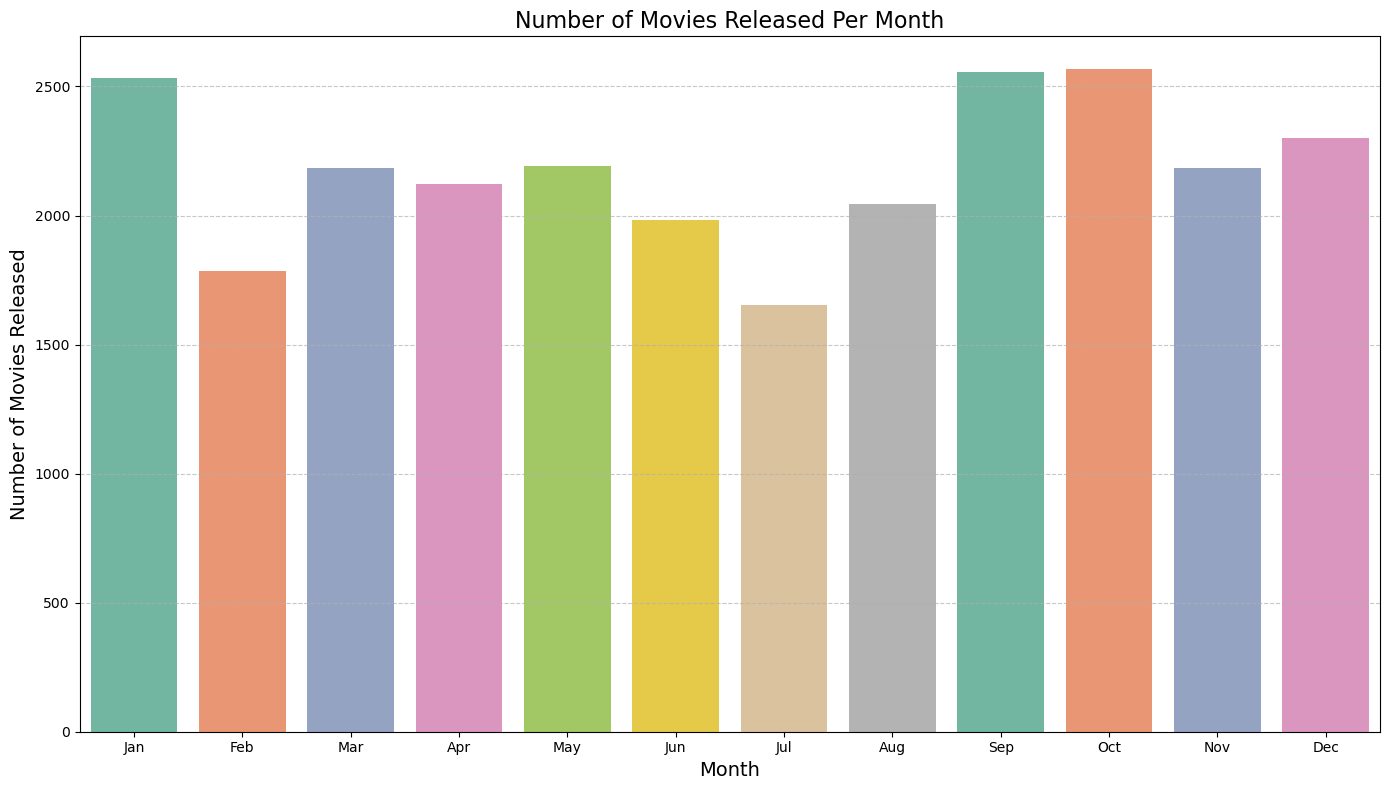

In [36]:
#Number of movies released for each month in our dataset

#Count the number of movies per month, independent of the release year
df_rel = df_release[df_release['decade'] > 1900]
movie_counts = df_rel['Movie release month'].value_counts().sort_index()

#Ploting
plt.figure(figsize=(14, 8))
sns.barplot(x=movie_counts.index, y=movie_counts.values, palette="Set2", legend = False, hue = movie_counts.index)

plt.title("Number of Movies Released Per Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Movies Released", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(ticks=np.arange(12), labels=month_names)

plt.tight_layout()
plt.savefig('visuals/15.png', bbox_inches='tight')
plt.show()

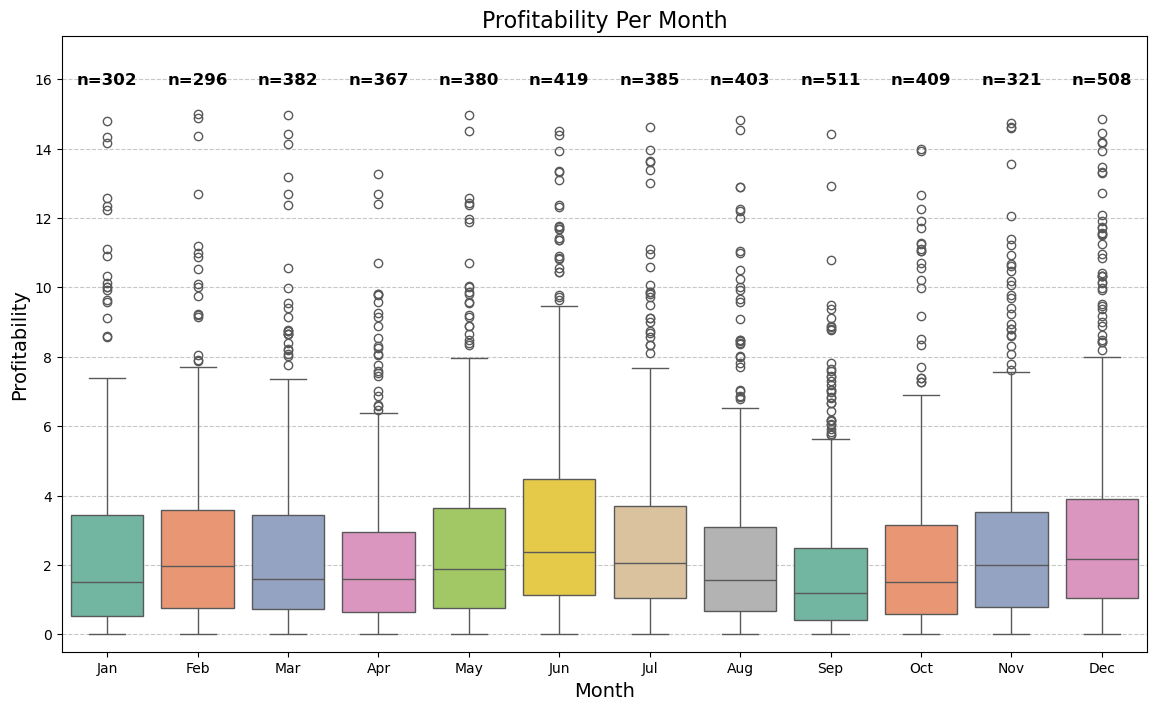

In [37]:
#Boxplot of profitability per month (independent from release year)

#plotting
plt.figure(figsize=(14, 8))

sns.boxplot(x="Movie release month",y="profitability",data=df_filtered,legend = False,hue = "Movie release month",palette="Set2")

plt.title("Profitability Per Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Profitability", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Add number of samples per month (we have lesser samples than in the previous plot, as there is a lot of missing budgets and revenues
counts = df_filtered['Movie release month'].value_counts().sort_index()
ax = plt.gca()  
y_max = df_filtered['profitability'].max()
y_min = df_filtered['profitability'].min()
y_range = y_max - y_min

for i, decade in enumerate(sorted(counts.index)):
    count = counts[decade]
    ax.text(i, y_max + 0.05 * y_range,  f'n={count}', ha='center', va='bottom',fontsize=12,fontweight='bold')

plt.ylim(y_min-0.5, y_max + 0.15 * y_range)

#Change the numerical x labels to their corresponding month
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(ticks=np.linspace(0,11,12), labels=month_names)
plt.savefig('visuals/16.png', bbox_inches='tight')
plt.show()

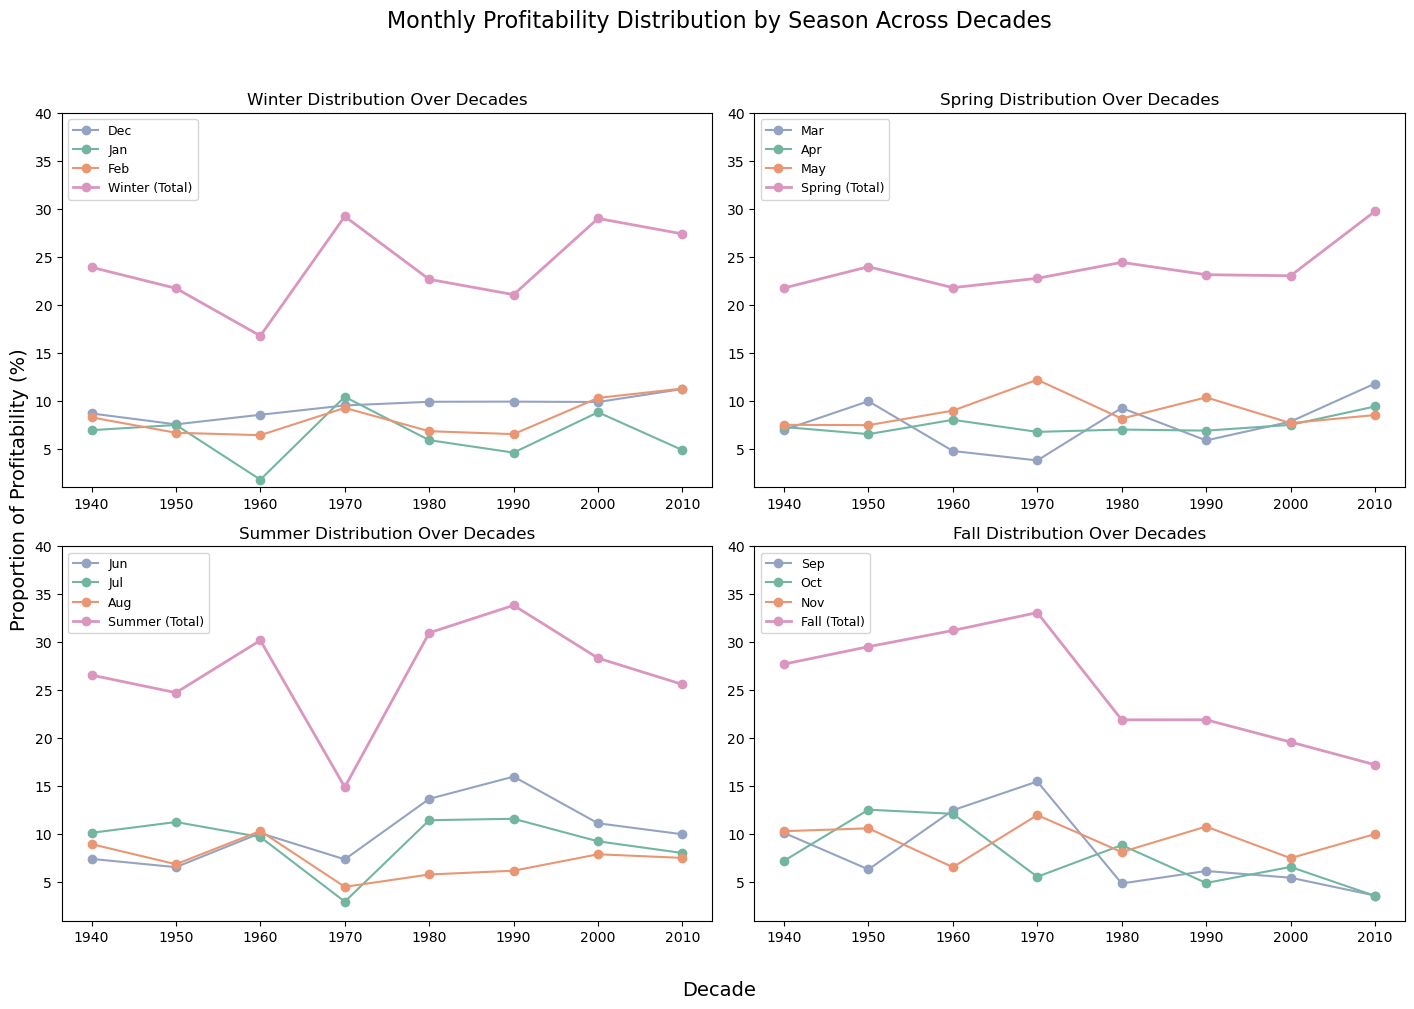

In [38]:
#Line plot showing the proportion of profitability achieved each month for a given decade, grouped by season to observe trends over time.

#preparation of the data : table that for each decade and month, gives the median profitability
df_data = df_filtered[df_filtered['decade']>1930]
data = df_data.pivot_table(index="decade", columns="Movie release month", values="profitability", aggfunc="median").fillna(0)

#Make the data proportional per month, to see how much a given month contributes to the total profitability of a given decade
data_proportional = data.div(data.sum(axis=1), axis=0)*100
counts = df_data['decade'].value_counts().sort_index()

#Names and colors for the line plots
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
seasons = {"Winter": [12, 1, 2], "Spring": [3, 4, 5], "Summer": [6, 7, 8], "Fall": [9, 10, 11]}
colors = ['#72b6a1', '#e99675', '#95a3c3','#72b6a1', '#e99675', '#95a3c3','#72b6a1', '#e99675', '#95a3c3','#72b6a1', '#e99675', '#95a3c3']

#Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False, sharey=False)
axes = axes.flatten()

for i, (season_name, months) in enumerate(seasons.items()):
    ax = axes[i]

    #Plot months
    for month in months:
        ax.plot(data_proportional.index, data_proportional[month], label=month_names[month-1], marker="o", color=colors[month-1])

    #Plot seasons
    season_sum = data_proportional[months].sum(axis=1)
    ax.plot(data_proportional.index, season_sum, label=f"{season_name} (Total)", color="#db96c0", linewidth=2, linestyle="-", marker="o")

    ax.set_title(f"{season_name} Distribution Over Decades", fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.legend(loc="upper left", fontsize=9)
    ax.set_ylim(1, 40)

fig.text(0.0, 0.5, 'Proportion of Profitability (%)', ha='center', va='center', rotation='vertical', fontsize=14)
fig.text(0.5, 0, 'Decade', ha='center', va='center', rotation='horizontal', fontsize=14)

fig.suptitle("Monthly Profitability Distribution by Season Across Decades", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('visuals/17.png', bbox_inches='tight')
plt.show()


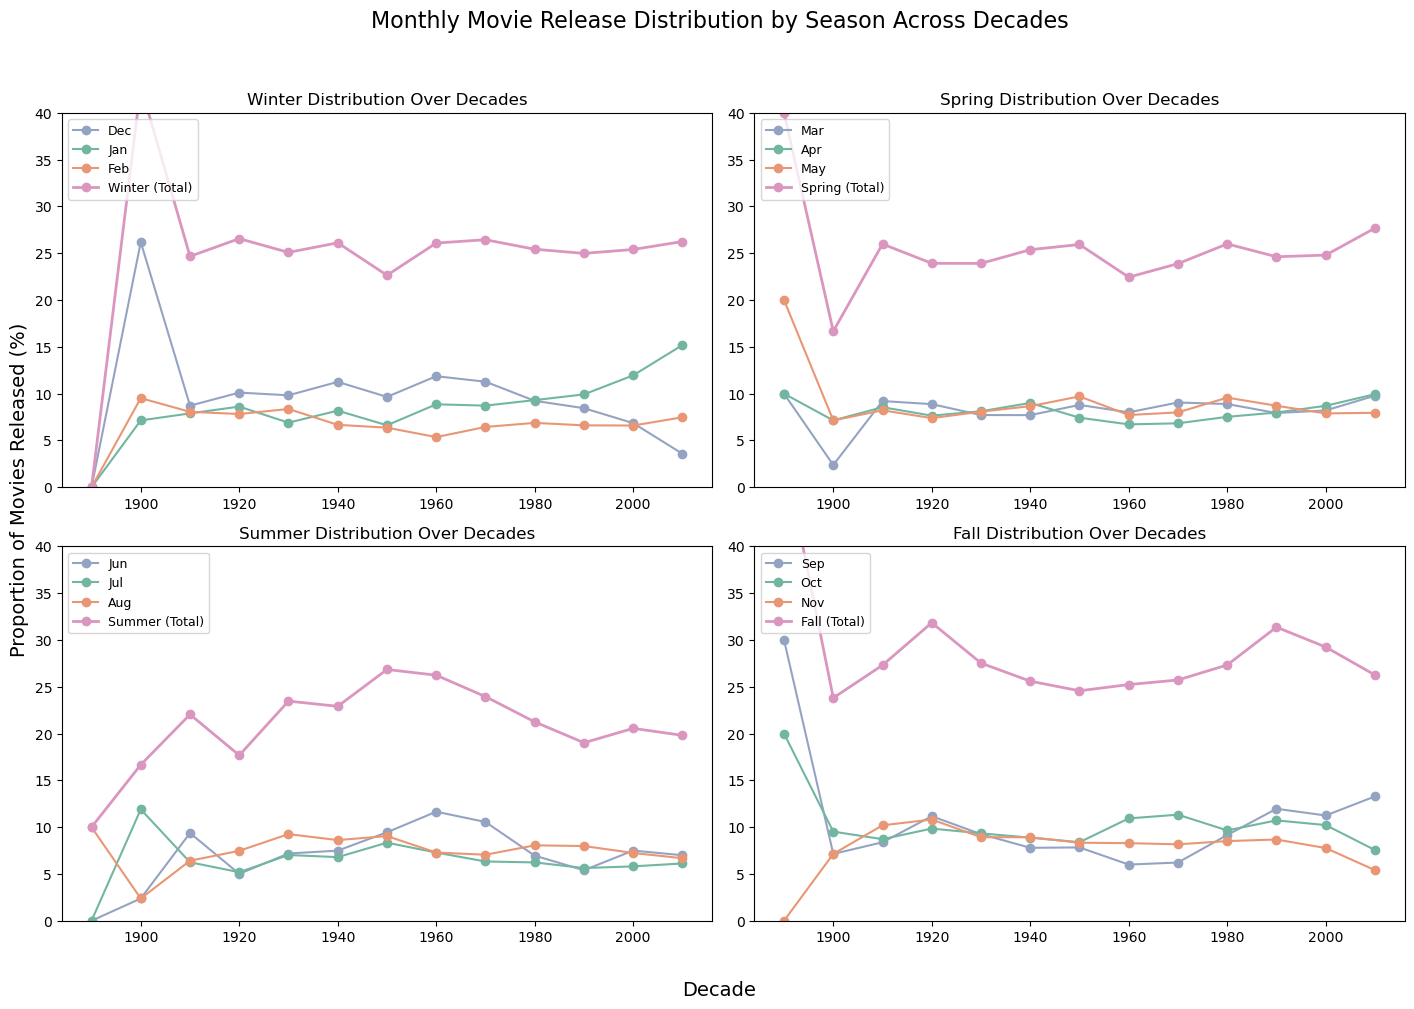

In [39]:
#Line plot showing the proportion of movies released per month for a given decade, grouped by season to observe trends over time.
df_release_counts = df_release.groupby(['decade', 'Movie release month']).size().reset_index(name='count')

#preparation of the data : table that for each decade and month, gives the median profitability
df_release_counts['proportion'] = df_release_counts.groupby('decade')['count'].transform(lambda x: x / x.sum()) * 100
df_release_counts = df_release_counts.sort_values(by='decade', ascending=False)
data_proportional = df_release_counts.pivot(index="decade", columns="Movie release month", values="proportion").fillna(0)

#Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False, sharey=False)
axes = axes.flatten()

for i, (season_name, months) in enumerate(seasons.items()):
    ax = axes[i]
    for month in months:
        ax.plot(data_proportional.index, data_proportional[month], label=month_names[month - 1], marker="o", color=colors[month - 1])
    season_sum = data_proportional[months].sum(axis=1)
    ax.plot(data_proportional.index, season_sum, label=f"{season_name} (Total)", color="#db96c0", linewidth=2, linestyle="-", marker="o")
    ax.set_title(f"{season_name} Distribution Over Decades", fontsize=12)
    ax.legend(loc="upper left", fontsize=9)
    ax.set_ylim(0, 40)


fig.text(0.0, 0.5, 'Proportion of Movies Released (%)', ha='center', va='center', rotation='vertical', fontsize=14)
fig.text(0.5, 0, 'Decade', ha='center', va='center', rotation='horizontal', fontsize=14)
fig.suptitle("Monthly Movie Release Distribution by Season Across Decades", fontsize=16)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('visuals/18.png', bbox_inches='tight')
plt.show()



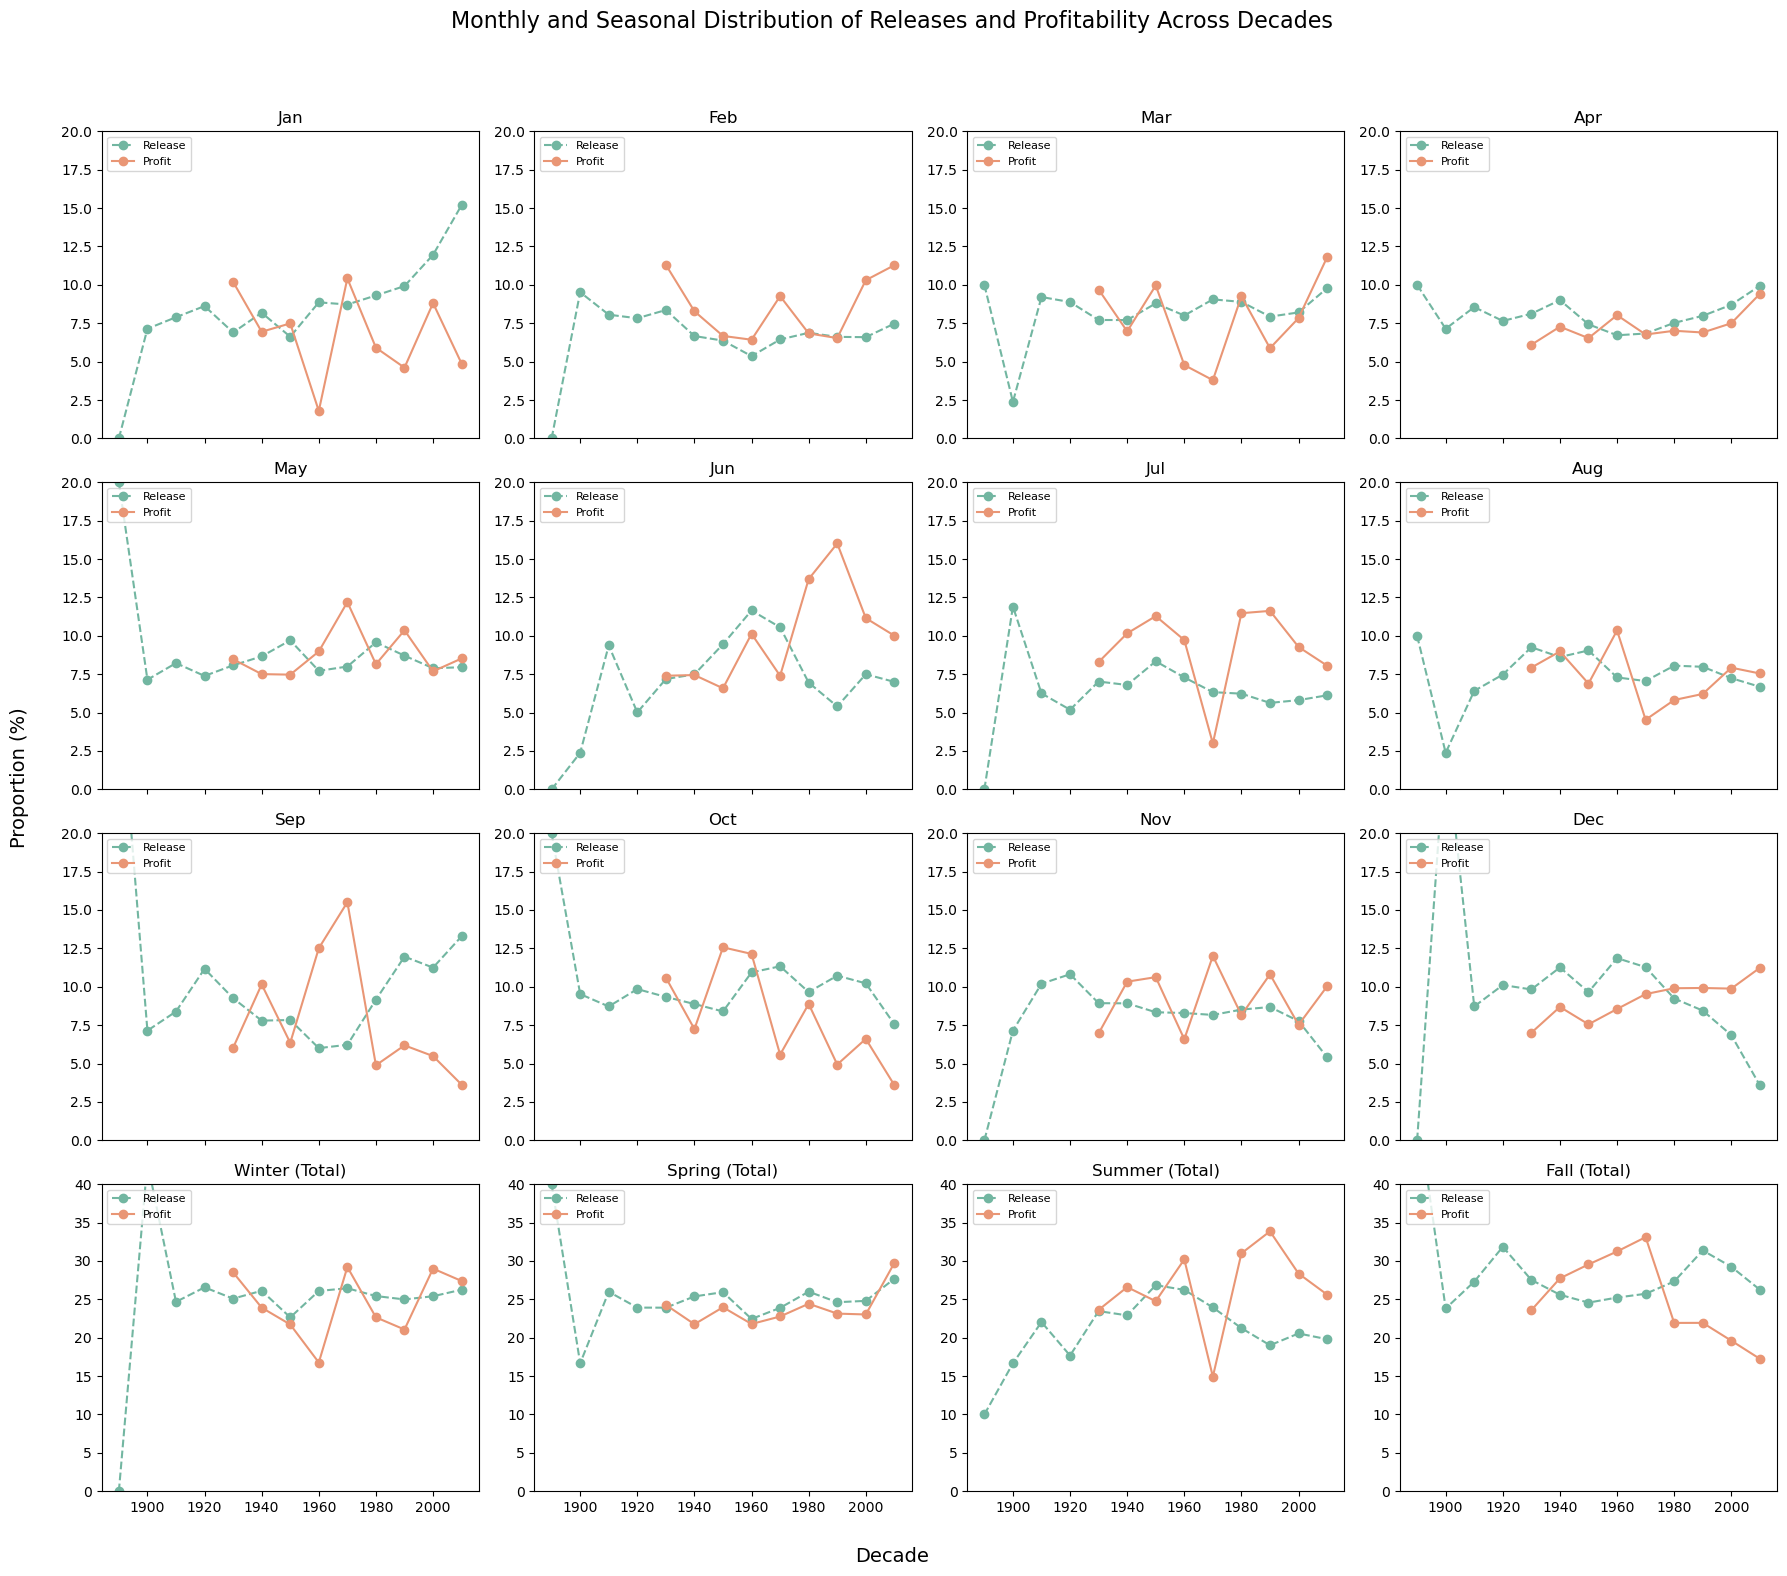

In [40]:
#Comparison of proportions of profitability and movies released. 

#Prepare release data
df_release_counts = df_release.groupby(['decade', 'Movie release month']).size().reset_index(name='count')
df_release_counts['proportion'] = df_release_counts.groupby('decade')['count'].transform(lambda x: x / x.sum()) * 100
df_release_counts = df_release_counts.sort_values(by='decade', ascending=False)
data_release = df_release_counts.pivot(index="decade", columns="Movie release month", values="proportion").fillna(0)

#Prepare profitability data
df_data = df_filtered[df_filtered['decade'] > 1929]
data_profitability = df_data.pivot_table(index="decade", columns="Movie release month", values="profitability", aggfunc="median").fillna(0)
data_profitability = data_profitability.div(data_profitability.sum(axis=1), axis=0) * 100

#Plotting
fig, axes = plt.subplots(4, 4, figsize=(18, 16), sharex=True, sharey=False)
axes = axes.flatten()

#1 plot per month
for i, month in enumerate(range(1, 13)):
    ax = axes[i]
    ax.plot(data_release.index, data_release[month], label="Release", marker="o", linestyle="--", color="#72b6a1")
    ax.plot(data_profitability.index, data_profitability[month], label="Profit", marker="o", linestyle="-", color="#e99675")
    ax.set_title(month_names[month - 1], fontsize=12)
    ax.legend(loc="upper left", fontsize=8)
    ax.set_ylim(0, 20)

#1 plot per season
for i, (season_name, months) in enumerate(seasons.items(), start=12):
    ax = axes[i]
    release_season_sum = data_release[months].sum(axis=1)
    profit_season_sum = data_profitability[months].sum(axis=1)
    ax.plot(data_release.index, release_season_sum, label="Release", marker="o", linestyle="--", color="#72b6a1")
    ax.plot(data_profitability.index, profit_season_sum, label="Profit", marker="o", linestyle="-", color="#e99675")
    ax.set_title(f"{season_name} (Total)", fontsize=12)
    ax.legend(loc="upper left", fontsize=8)
    ax.set_ylim(0, 40)

fig.text(0.5, 0.01, 'Decade', ha='center', fontsize=14)
fig.text(0.01, 0.5, 'Proportion (%)', va='center', rotation='vertical', fontsize=14)
fig.suptitle("Monthly and Seasonal Distribution of Releases and Profitability Across Decades", fontsize=16)

fig.tight_layout(rect=[0.03, 0.03, 1, 0.95])
plt.savefig('visuals/19.png', bbox_inches='tight')
plt.show()


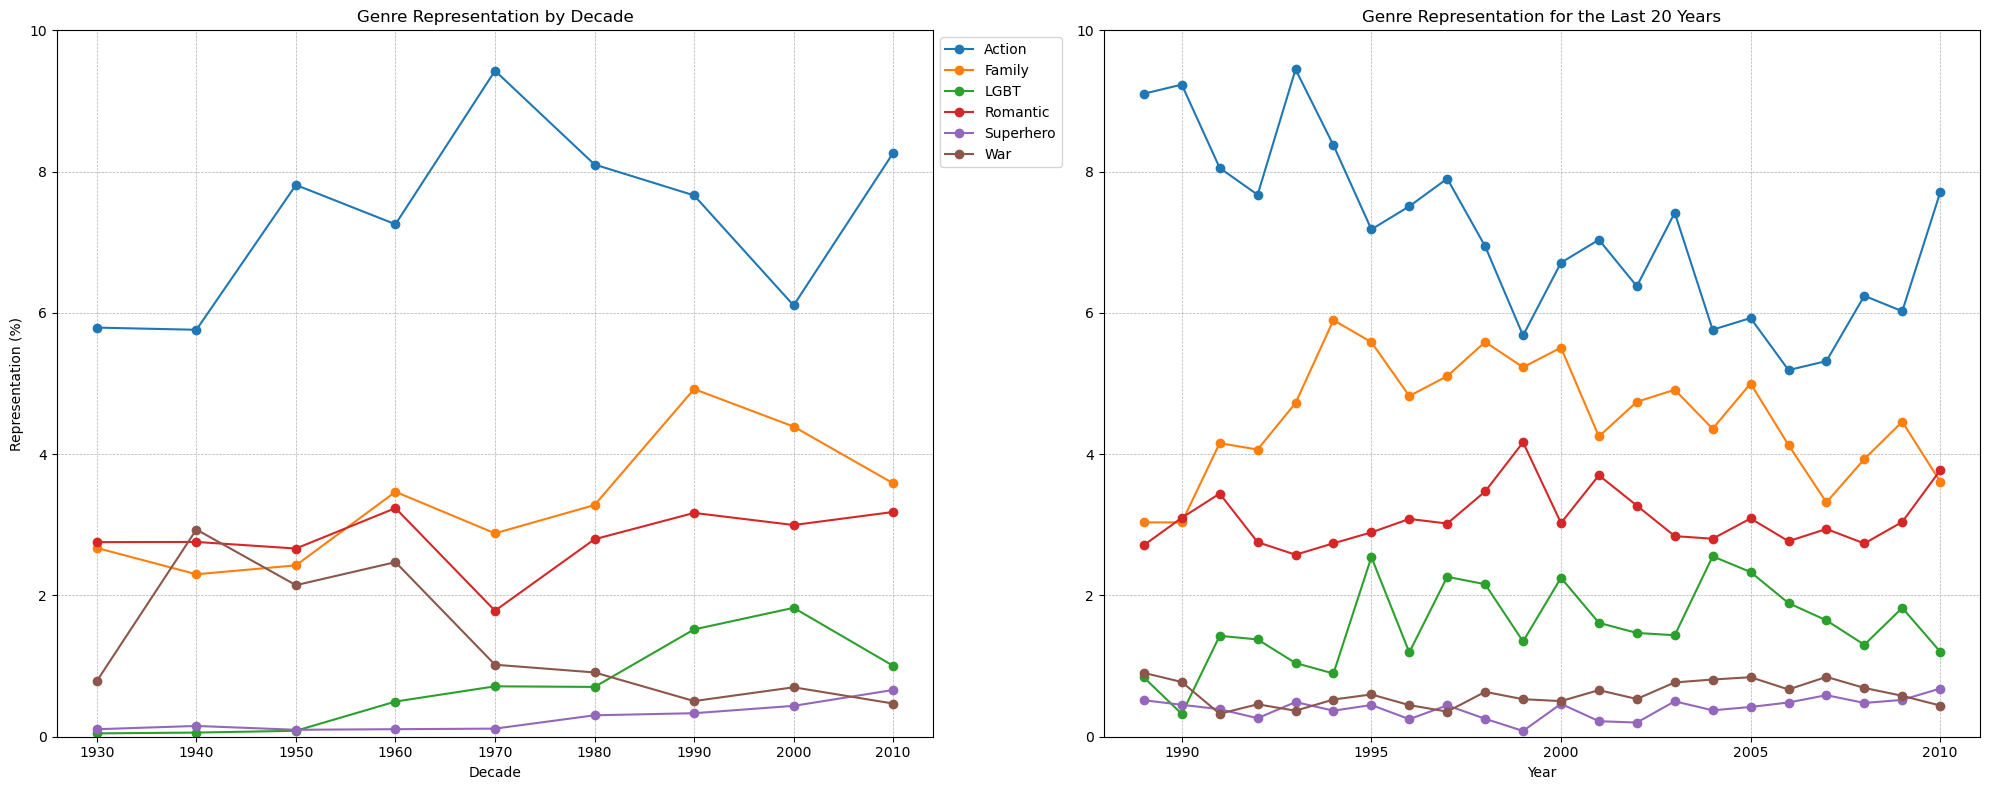

In [41]:
#We use the extended genres dataset
#Add the representation % to a dataframe after grouping and counting the occurences of each genre per decade. We start from 1929 as sample size is too small before that
df_genres_old = df_genres[df_genres['decade'] > 1929]
df_gen_old = df_genres_old.groupby(['decade', 'Movie genres']).size()
df_gen_old = df_gen_old.reset_index()
df_gen_old.columns = ['decade', 'Movie genres', 'count']
df_gen_old['total'] = df_gen_old.groupby('decade')['count'].transform('sum')
df_gen_old['percentage'] = (df_gen_old['count'] / df_gen_old['total']) * 100
df_gen_old['Movie genres'] = df_gen_old['Movie genres'].astype(str)

#Keep only genres we are interested in
df_gen_old = df_gen_old[df_gen_old['Movie genres'].isin(genres_list)].reset_index(drop=True)

#Organize data
pivot_table_old = df_gen_old.pivot(index='decade', columns='Movie genres', values='percentage').fillna(0)


df_genres_new = df_genres[df_genres['Movie release year'] > 1988]
df_genres_new = df_genres_new[df_genres_new['Movie release year'] < 2011]

df_gen_new = df_genres_new.groupby(['Movie release year', 'Movie genres']).size()
df_gen_new = df_gen_new.reset_index()
df_gen_new.columns = ['Movie release year', 'Movie genres', 'count']
df_gen_new['total'] = df_gen_new.groupby('Movie release year')['count'].transform('sum')
df_gen_new['percentage'] = (df_gen_new['count'] / df_gen_new['total']) * 100
df_gen_new['Movie genres'] = df_gen_new['Movie genres'].astype(str)

#Keep only genres we are interested in
df_gen_new = df_gen_new[df_gen_new['Movie genres'].isin(genres_list)].reset_index(drop=True)

#Organize data
pivot_table_new = df_gen_new.pivot(index='Movie release year', columns='Movie genres', values='percentage').fillna(0)


#Plotting
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=False)

#Plot 1: genre representation by decade
pivot_table_old.plot(kind='line', ax=axes[0], marker='o')
axes[0].set_title("Genre Representation by Decade")
axes[0].set_xlabel("Decade")
axes[0].set_ylabel("Representation (%)")
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[0].legend(bbox_to_anchor=(1, 1), loc='upper left')
axes[0].set_ylim(0, 10)

#Plot 2: genre representation for the last 20 years
pivot_table_new.plot(kind='line', ax=axes[1], marker='o')
axes[1].set_title("Genre Representation for the Last 20 Years")
axes[1].set_xlabel("Year")
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].legend_.remove()
axes[1].set_ylim(0, 10)

plt.tight_layout()
plt.savefig('visuals/20.png', bbox_inches='tight')
plt.show()

## Hypothesis 4: Some genres or themes are more popular and might draw more spectators


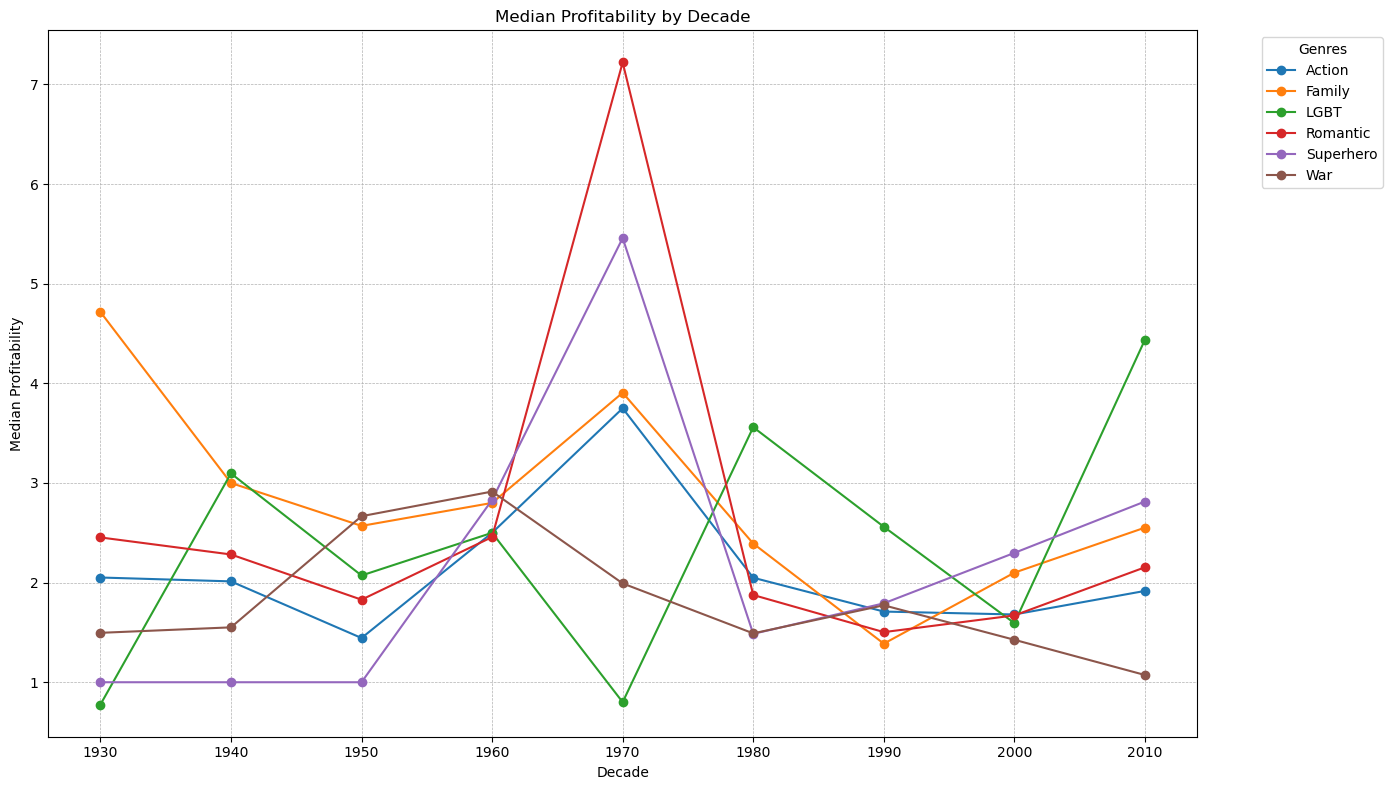

In [43]:
#We use the extended genres dataset
#Add the representation % to a dataframe after grouping and counting the occurences of each genre per decade. We start from 1929 as sample size is too small before that
df_genres__ = df_exploded[df_exploded['decade'] > 1929]
df_gen = df_genres__.groupby(['decade', 'Movie genres'])['profitability'].median().reset_index()
df_gen.columns = ['decade', 'Movie genres', 'median profitability']
df_gen['Movie genres'] = df_gen['Movie genres'].astype(str)

#Keep only genres we are interested in
df_gen = df_gen[df_gen['Movie genres'].isin(genres_list)].reset_index(drop=True)

#Organize data
pivot_table = df_gen.pivot(index='decade', columns='Movie genres', values='median profitability').fillna(1)


#Plotting
pivot_table.plot(kind='line', figsize=(14, 8), marker='o')

plt.title("Median Profitability by Decade")
plt.xlabel("Decade")
plt.ylabel("Median Profitability")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('visuals/21.png', bbox_inches='tight')
plt.show()


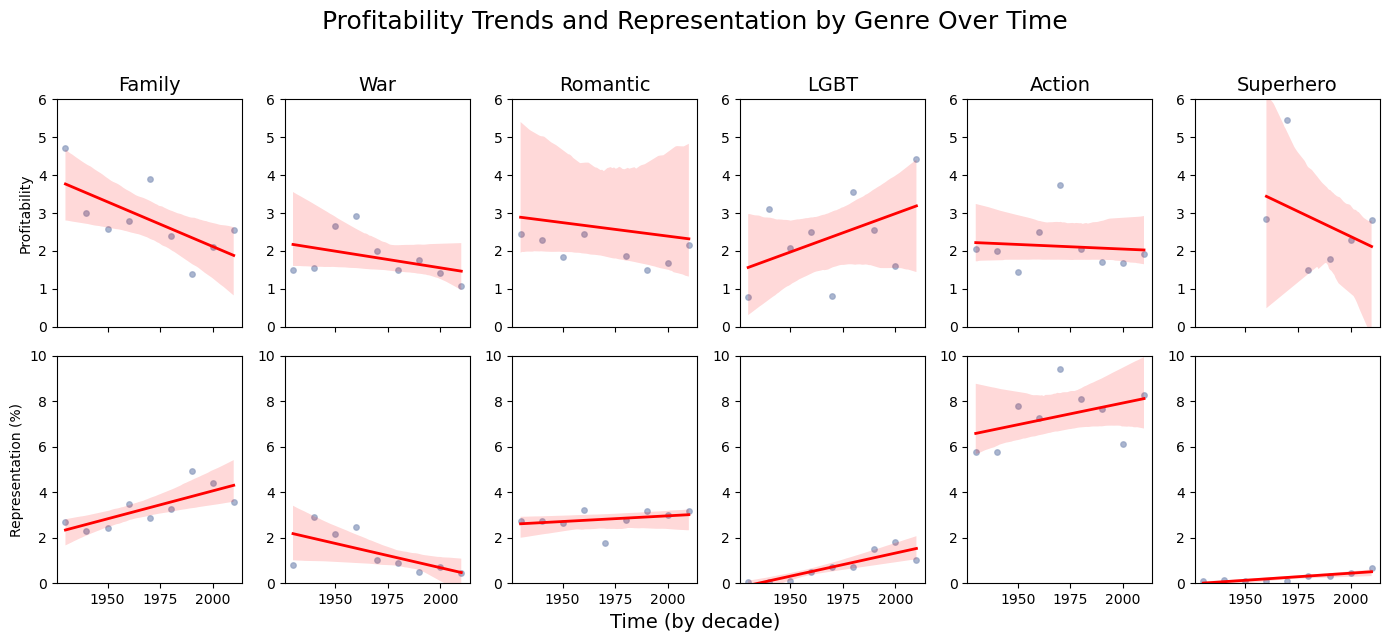

In [44]:
# Regression and scatterplot with 95% confidence interval which show how profitability evolved over time, and how representation of movie genres 
# evolved over time for the last 100 years. 

#Plot grid creation
n_rows, n_cols = 2, 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6), sharex=True, sharey=False)
axes = axes.flatten()

#Row 1 : profitability evolution over time for each studied genre
#Preparing data, keeping only data related to our genres and take the median profitability for each decade
df_genres_decade = df_exploded.groupby(['decade', 'Movie genres'])['profitability'].median().reset_index()
df_genres_decade = df_genres_decade[df_genres_decade['Movie genres'].isin(genres_list)].reset_index(drop=True)
df_genres_decade = df_genres_decade[df_genres_decade['decade'] > 1929]

#Plots with regression line and 95% confidence interval to observe trend
for i, theme in enumerate(genres_list):
    ax = axes[i]  
    theme_data = df_genres_decade[df_genres_decade['Movie genres'] == theme]
    sns.regplot(x='decade', y='profitability', data=theme_data, ax=ax, color='#95a3c3', scatter_kws={'s': 15}, 
                line_kws={'color': 'red', 'linewidth': 2})
    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 6)
    ax.set_xlabel("")
    ax.set_ylabel('Profitability')
    if i % n_cols != 0: 
        ax.set_ylabel("")



# Row 2: Percentage of each genre by decade to observe if it relates to the profitability trend
#Preparing data, keeping only data related to our genres and compute how much each genre is represented across all genres in %
df_genres_pct = df_genres.groupby(['decade', 'Movie genres']).size().reset_index(name='count')
df_genres_pct = df_genres_pct[df_genres_pct['decade'] > 1929]
df_genres_pct['total'] = df_genres_pct.groupby('decade')['count'].transform('sum')
df_genres_pct['percentage'] = (df_genres_pct['count'] / df_genres_pct['total']) * 100
df_genres_pct = df_genres_pct[df_genres_pct['Movie genres'].isin(genres_list)].reset_index(drop=True)

#Plots with regression line and 95% confidence interval to observe trend
for i, theme in enumerate(genres_list):
    ax = axes[1 * n_cols + i] 
    theme_data = df_genres_pct[df_genres_pct['Movie genres'] == theme]
    sns.regplot(x='decade', y='percentage', data=theme_data, ax=ax, color='#95a3c3', scatter_kws={'s': 15}, 
        line_kws={'color': 'red', 'linewidth': 2})
    #ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 10)  
    ax.set_xlabel("")
    ax.set_ylabel('Representation (%)')
    if i % n_cols != 0:
        ax.set_ylabel("")

    
fig.suptitle("Profitability Trends and Representation by Genre Over Time", fontsize=18, y=1.02)
plt.tight_layout()
fig.text(0.5, -0.01, "Time (by decade)", ha='center', fontsize=14)
plt.savefig('visuals/22.png', bbox_inches='tight')
plt.show()


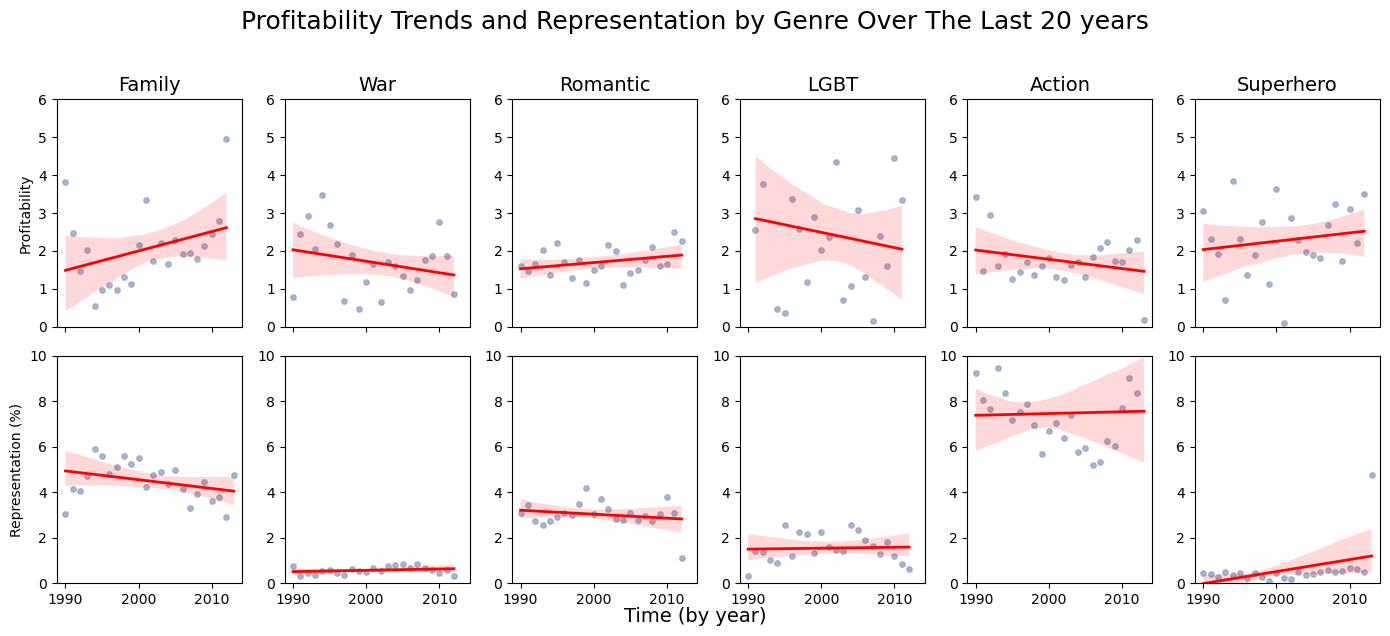

In [45]:
# Regression and scatterplot with 95% confidence interval which show how profitability evolved over the last 20 years, and how representation of movie genres 
# evolved over time for the last 20 years. 

#Plot grid creation
n_rows, n_cols = 2, 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6), sharex=True, sharey=False)
axes = axes.flatten()

#Row 1 : profitability evolution over time for each studied genre
#Preparing data, keeping only data related to our genres and take the median profitability for each decade
df_genres_decade = df_exploded.groupby(['Movie release year', 'Movie genres'])['profitability'].median().reset_index()
df_genres_decade = df_genres_decade[df_genres_decade['Movie genres'].isin(genres_list)].reset_index(drop=True)
df_genres_decade = df_genres_decade[df_genres_decade['Movie release year'] > 1989]

#Plots with regression line and 95% confidence interval to observe trend
for i, theme in enumerate(genres_list):
    ax = axes[i]  
    theme_data = df_genres_decade[df_genres_decade['Movie genres'] == theme]
    sns.regplot(x='Movie release year', y='profitability', data=theme_data, ax=ax, color='#95a3c3', scatter_kws={'s': 15}, 
                line_kws={'color': 'red', 'linewidth': 2})
    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 6)
    ax.set_xlabel("")
    ax.set_ylabel('Profitability')
    if i % n_cols != 0: 
        ax.set_ylabel("")



# Row 2: Percentage of each genre by decade to observe if it relates to the profitability trend
#Preparing data, keeping only data related to our genres and compute how much each genre is represented across all genres in %
df_genres_pct = df_genres.groupby(['Movie release year', 'Movie genres']).size().reset_index(name='count')
df_genres_pct = df_genres_pct[df_genres_pct['Movie release year'] > 1989]
df_genres_pct['total'] = df_genres_pct.groupby('Movie release year')['count'].transform('sum')
df_genres_pct['percentage'] = (df_genres_pct['count'] / df_genres_pct['total']) * 100
df_genres_pct = df_genres_pct[df_genres_pct['Movie genres'].isin(genres_list)].reset_index(drop=True)

#Plots with regression line and 95% confidence interval to observe trend
for i, theme in enumerate(genres_list):
    ax = axes[1 * n_cols + i]  
    theme_data = df_genres_pct[df_genres_pct['Movie genres'] == theme]
    sns.regplot(x='Movie release year', y='percentage', data=theme_data, ax=ax, color='#95a3c3', scatter_kws={'s': 15}, 
        line_kws={'color': 'red', 'linewidth': 2})
    #ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 10)  
    ax.set_xlabel("")
    ax.set_ylabel('Representation (%)')
    if i % n_cols != 0:
        ax.set_ylabel("")

    
fig.suptitle("Profitability Trends and Representation by Genre Over The Last 20 years", fontsize=18, y=1.02)
plt.tight_layout()
fig.text(0.5, -0.00, "Time (by year)", ha='center', fontsize=14)
plt.savefig('visuals/23.png', bbox_inches='tight')
plt.show()

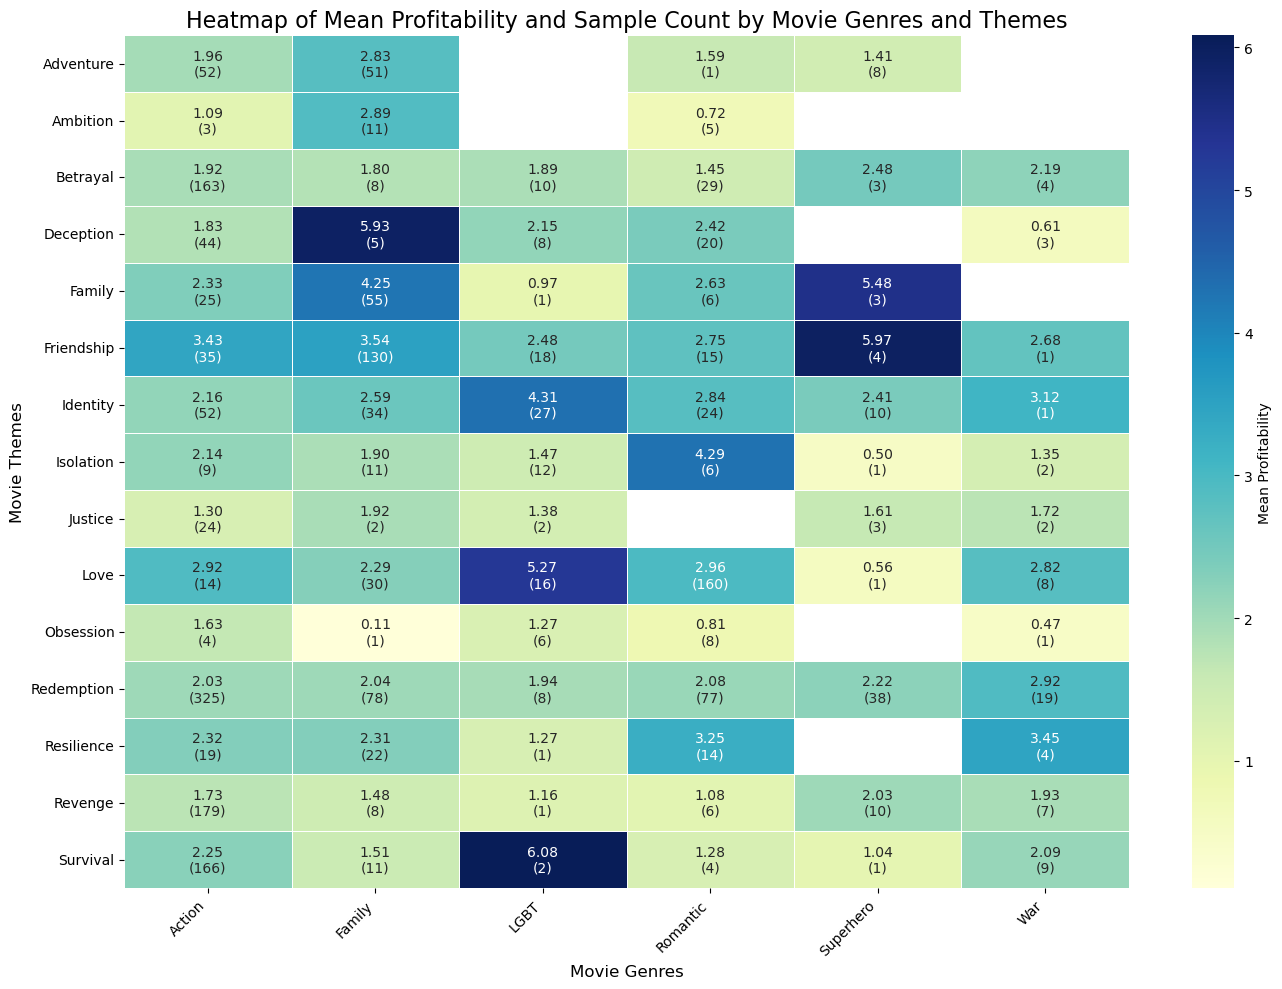

In [46]:
#Heatmap linking themes to genres, for profitability (including sample count between parenthesis)

#Prepare data of the last 20 years, keeping only the genres and themes we focus on
df_heatmap = df_exploded.copy()  
df_heatmap = df_heatmap[df_heatmap['decade'] > 1989] 
df_heatmap = df_heatmap[df_heatmap['Movie genres'].isin(genres_list)].reset_index(drop=True)
df_heatmap = df_heatmap[df_heatmap['Theme'].isin(top_10_themes.index)].reset_index(drop=True)

#Get the mean profitability and sample size for each couple, organise it in a table. 
#Note : the sample sizes are smaller than previously, therefore we use the mean instead of median. ex. 0.5 3, 3 would overestimate profitability if not a lot of samples
df_aggregated = df_heatmap.groupby(['Movie genres', 'Theme']).agg(mean_profitability=('profitability', 'mean'), 
        sample_size=('profitability', 'size')).reset_index()

df_heatmap_mean = df_aggregated.pivot(index="Theme", columns="Movie genres", values="mean_profitability")
df_heatmap_count = df_aggregated.pivot(index="Theme", columns="Movie genres", values="sample_size")

#Combine mean profitability and sample count into a formatted str
annotations = pd.DataFrame("", index=df_heatmap_mean.index, columns=df_heatmap_mean.columns, dtype=object)
for row in annotations.index:
    for col in annotations.columns:
        mean = df_heatmap_mean.loc[row, col]
        count = df_heatmap_count.loc[row, col]
        if not pd.isna(mean) and not pd.isna(count):
            annotations.loc[row, col] = f"{mean:.2f}\n({int(count)})"

#Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_heatmap_mean, annot=annotations,  fmt="", cmap="YlGnBu",linewidths=0.5,cbar_kws={'label': 'Mean Profitability'})

plt.title("Heatmap of Mean Profitability and Sample Count by Movie Genres and Themes", fontsize=16)
plt.xlabel("Movie Genres", fontsize=12)
plt.ylabel("Movie Themes", fontsize=12)

plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.savefig('visuals/24.png', bbox_inches='tight')
plt.show()

In [47]:
theme_list = ['Friendship', 'Resilience', 'Identity', 'Deception', 'Love','Family']

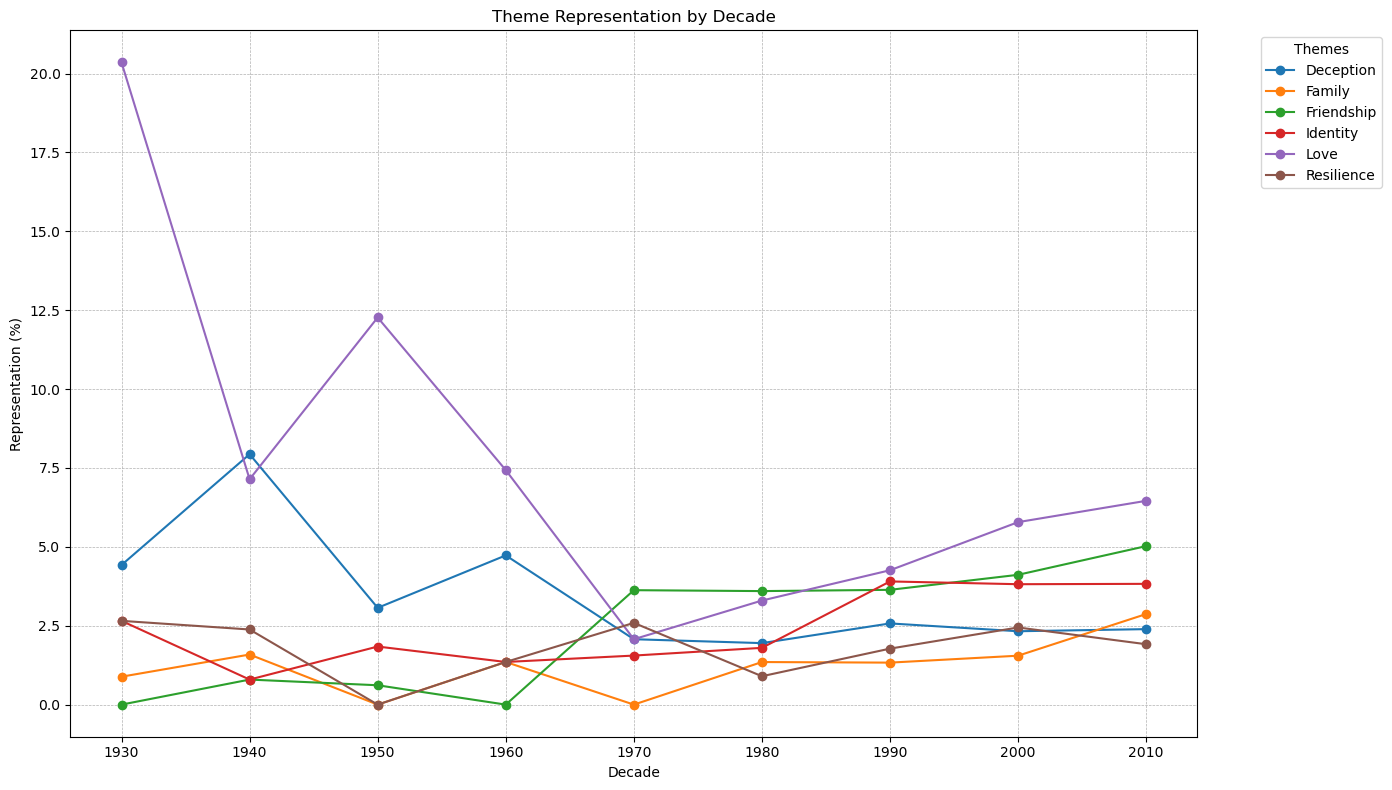

In [48]:
#We use the extended theme dataset
#Add the representation % to a dataframe after grouping and counting the occurences of each theme per decade. We start from 1929 as sample size is too small before that
df_theme_old = df_filtered[df_filtered['decade'] > 1929]
df_the_old = df_theme_old.groupby(['decade', 'Theme']).size()
df_the_old = df_the_old.reset_index()
df_the_old.columns = ['decade', 'Theme', 'count']
df_the_old['total'] = df_the_old.groupby('decade')['count'].transform('sum')
df_the_old['percentage'] = (df_the_old['count'] / df_the_old['total']) * 100
df_the_old['Theme'] = df_the_old['Theme'].astype(str)

#Keep only themes we are interested in
df_the_old = df_the_old[df_the_old['Theme'].isin(theme_list)].reset_index(drop=True)

#Organize data
pivot_table = df_the_old.pivot(index='decade', columns='Theme', values='percentage').fillna(0)


#Plotting
pivot_table.plot(kind='line', figsize=(14, 8), marker='o')

plt.title("Theme Representation by Decade")
plt.xlabel("Decade")
plt.ylabel("Representation (%)")
plt.legend(title="Themes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('visuals/25.png', bbox_inches='tight')
plt.show()

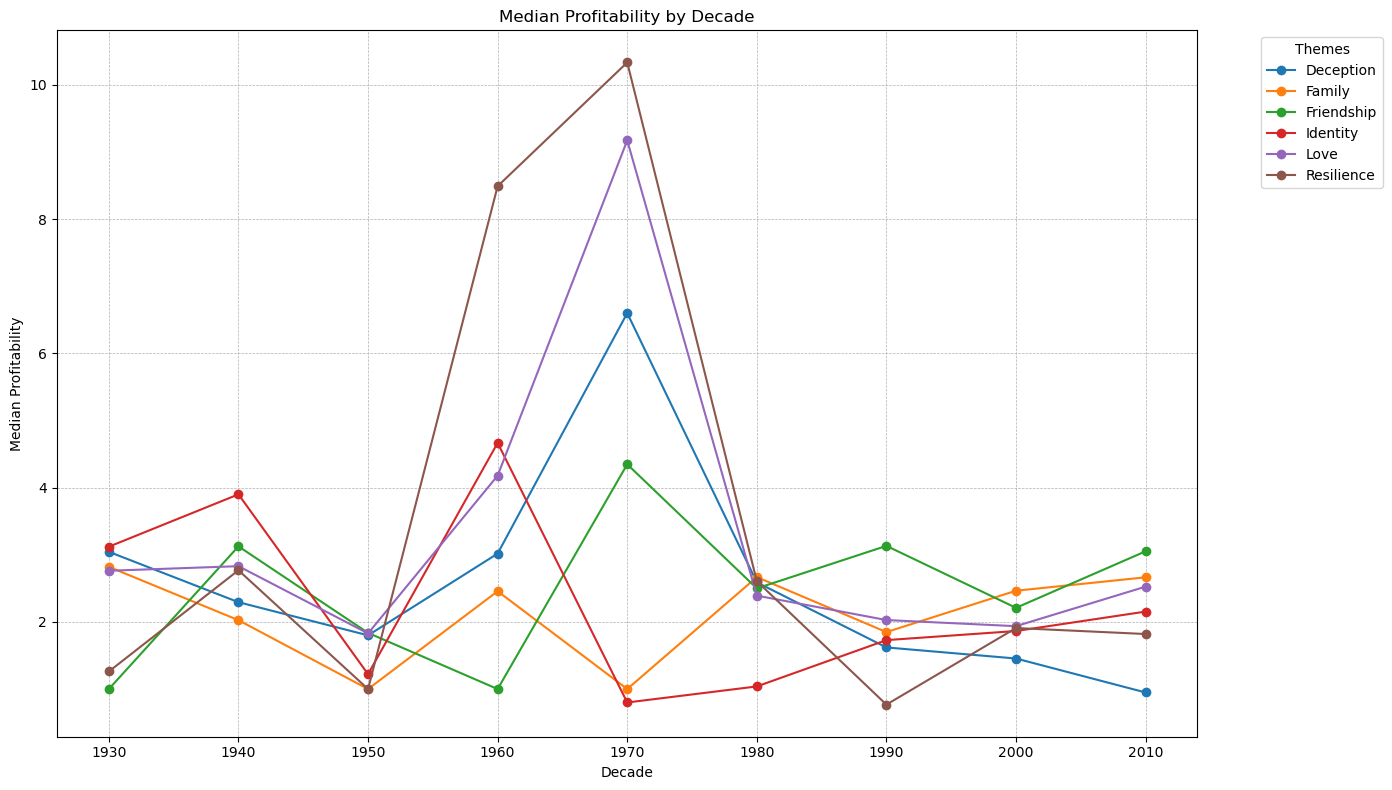

In [49]:
#We use the extended theme dataset
#Add the representation % to a dataframe after grouping and counting the occurences of each theme per decade. We start from 1929 as sample size is too small before that
df_theme__ = df_exploded[df_exploded['decade'] > 1929]
df_the = df_theme__.groupby(['decade', 'Theme'])['profitability'].median().reset_index()
df_the.columns = ['decade', 'Theme', 'median profitability']
df_the['Theme'] = df_the['Theme'].astype(str)

#Keep only themes we are interested in
df_the = df_the[df_the['Theme'].isin(theme_list)].reset_index(drop=True)

#Organize data
pivot_table = df_the.pivot(index='decade', columns='Theme', values='median profitability').fillna(1)


#Plotting
pivot_table.plot(kind='line', figsize=(14, 8), marker='o')

plt.title("Median Profitability by Decade")
plt.xlabel("Decade")
plt.ylabel("Median Profitability")
plt.legend(title="Themes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('visuals/26.png', bbox_inches='tight')
plt.show()

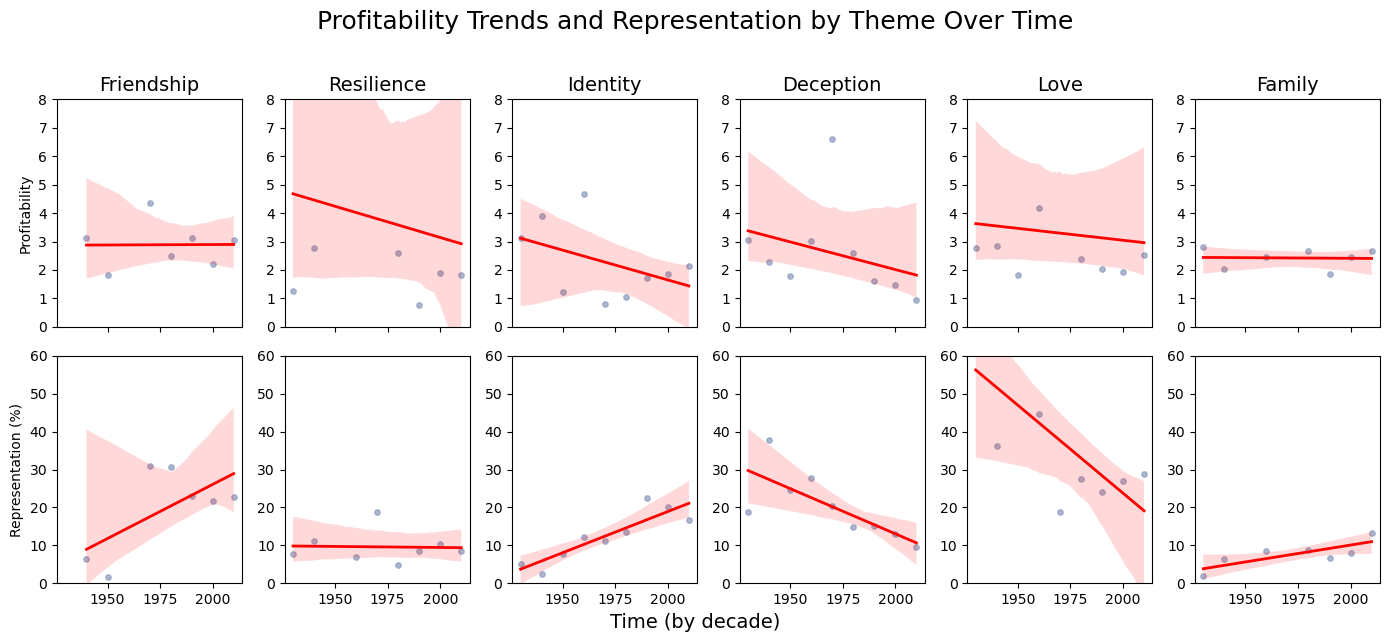

In [50]:
# Regression and scatterplot with 95% confidence interval which show how profitability evolved over time, and how representation of movie themes 
# evolved over time for the last 100 years. 

#Plot grid creation
n_rows, n_cols = 2, 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6), sharex=True, sharey=False)
axes = axes.flatten()

#Row 1 : profitability evolution over time for each studied theme
#Preparing data, keeping only data related to our themes and take the median profitability for each decade
df_theme_decade = df_exploded.groupby(['decade', 'Theme'])['profitability'].median().reset_index()
df_theme_decade = df_theme_decade[df_theme_decade['Theme'].isin(theme_list)].reset_index(drop=True)
df_theme_decade = df_theme_decade[df_theme_decade['decade'] > 1929]

#Plots with regression line and 95% confidence interval to observe trend
for i, theme in enumerate(theme_list):
    ax = axes[i]  
    theme_data = df_theme_decade[df_theme_decade['Theme'] == theme]
    sns.regplot(x='decade', y='profitability', data=theme_data, ax=ax, color='#95a3c3', scatter_kws={'s': 15}, 
                line_kws={'color': 'red', 'linewidth': 2})
    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 8)
    ax.set_xlabel("")
    ax.set_ylabel('Profitability')
    if i % n_cols != 0: 
        ax.set_ylabel("")



# Row 2: Percentage of each theme by decade to observe if it relates to the profitability trend
#Preparing data, keeping only data related to our themes and compute how much each theme is represented across all themes in %
df_theme_pct = df_exploded.groupby(['decade', 'Theme']).size().reset_index(name='count')
df_theme_pct = df_theme_pct[df_theme_pct['Theme'].isin(theme_list)].reset_index(drop=True)
df_theme_pct = df_theme_pct[df_theme_pct['decade'] > 1929]

df_theme_pct['total'] = df_theme_pct.groupby('decade')['count'].transform('sum')
df_theme_pct['percentage'] = (df_theme_pct['count'] / df_theme_pct['total']) * 100

#Plots with regression line and 95% confidence interval to observe trend
for i, theme in enumerate(theme_list):
    ax = axes[1 * n_cols + i] 
    theme_data = df_theme_pct[df_theme_pct['Theme'] == theme]
    sns.regplot(x='decade', y='percentage', data=theme_data, ax=ax, color='#95a3c3', scatter_kws={'s': 15}, 
        line_kws={'color': 'red', 'linewidth': 2})
    #ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 60)  
    ax.set_xlabel("")
    ax.set_ylabel('Representation (%)')
    if i % n_cols != 0:
        ax.set_ylabel("")

    
fig.suptitle("Profitability Trends and Representation by Theme Over Time", fontsize=18, y=1.02)
plt.tight_layout()
fig.text(0.5, -0.01, "Time (by decade)", ha='center', fontsize=14)
plt.savefig('visuals/27.png', bbox_inches='tight')
plt.show()

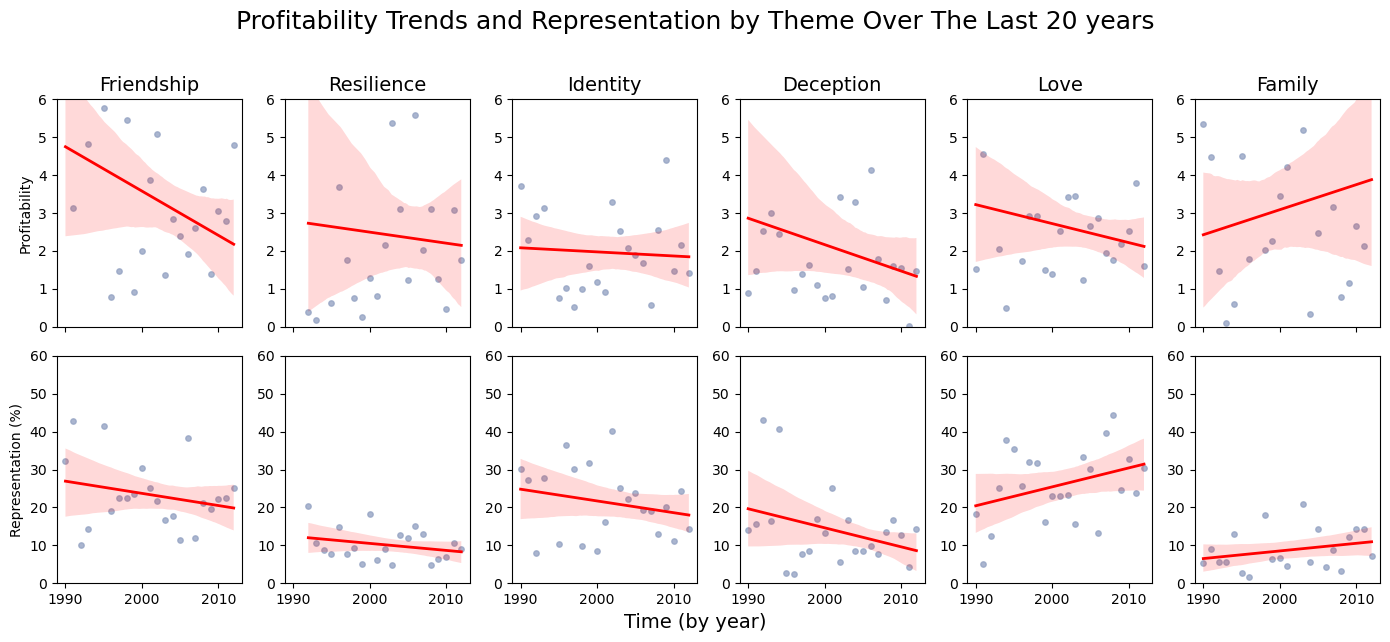

In [51]:
# Regression and scatterplot with 95% confidence interval which show how profitability evolved over the last 20 years, and how representation of movie themes 
# evolved over time for the last 20 years. 

#Plot grid creation
n_rows, n_cols = 2, 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6), sharex=True, sharey=False)
axes = axes.flatten()

#Row 1 : profitability evolution over time for each studied theme
#Preparing data, keeping only data related to our themes and take the median profitability for each decade
df_themes_decade = df_exploded.groupby(['Movie release year', 'Theme'])['profitability'].median().reset_index()
df_themes_decade = df_themes_decade[df_themes_decade['Theme'].isin(theme_list)].reset_index(drop=True)
df_themes_decade = df_themes_decade[df_themes_decade['Movie release year'] > 1989]

#Plots with regression line and 95% confidence interval to observe trend
for i, theme in enumerate(theme_list):
    ax = axes[i]  
    theme_data = df_themes_decade[df_themes_decade['Theme'] == theme]
    sns.regplot(x='Movie release year', y='profitability', data=theme_data, ax=ax, color='#95a3c3', scatter_kws={'s': 15}, 
                line_kws={'color': 'red', 'linewidth': 2})
    ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 6)
    ax.set_xlabel("")
    ax.set_ylabel('Profitability')
    if i % n_cols != 0: 
        ax.set_ylabel("")



# Row 2: Percentage of each theme by decade to observe if it relates to the profitability trend
#Preparing data, keeping only data related to our themes and compute how much each theme is represented across all themes in %
df_theme_pct = df_exploded.groupby(['Movie release year', 'Theme']).size().reset_index(name='count')
df_theme_pct = df_theme_pct[df_theme_pct['Theme'].isin(theme_list)].reset_index(drop=True)
df_theme_pct = df_theme_pct[df_theme_pct['Movie release year'] > 1989]

df_theme_pct['total'] = df_theme_pct.groupby('Movie release year')['count'].transform('sum')
df_theme_pct['percentage'] = (df_theme_pct['count'] / df_theme_pct['total']) * 100

#Plots with regression line and 95% confidence interval to observe trend
for i, theme in enumerate(theme_list):
    ax = axes[1 * n_cols + i]  
    theme_data = df_theme_pct[df_theme_pct['Theme'] == theme]
    sns.regplot(x='Movie release year', y='percentage', data=theme_data, ax=ax, color='#95a3c3', scatter_kws={'s': 15}, 
        line_kws={'color': 'red', 'linewidth': 2})
    #ax.set_title(f"{theme}", fontsize=14)
    ax.set_ylim(0, 60)  
    ax.set_xlabel("")
    ax.set_ylabel('Representation (%)')
    if i % n_cols != 0:
        ax.set_ylabel("")

    
fig.suptitle("Profitability Trends and Representation by Theme Over The Last 20 years", fontsize=18, y=1.02)
plt.tight_layout()
fig.text(0.5, -0.01, "Time (by year)", ha='center', fontsize=14)
plt.savefig('visuals/28.png', bbox_inches='tight')
plt.show()

## Combine the results

In [53]:
#Bubble chart representing the mean profitability for each month for each movie genre. The bubble sizes represent mean budget, sample count and mean runtime. 
#Note : the sample sizes are smaller than previously, therefore we use the mean instead of median. ex. 0.5 3, 3 would overestimate if very few samples

#Prepare data keeping only the last 20 years and genres we are interested in
df_bubbles = df_exploded.copy()  # Use your filtered dataset
df_bubbles = df_bubbles[df_bubbles['decade'] > 1989]  # Filter by decade
df_bubbles = df_bubbles[df_bubbles['Movie genres'].isin(genres_list)].reset_index(drop=True)

#Group by genre and month, and get the mean profitability, budget, runtime and sample size.
df_aggregated = df_bubbles.groupby(['Movie genres', 'Movie release month']).agg(mean_profitability=('profitability', 'mean'), mean_budget=('budget', 'mean'),
    sample_size=('profitability', 'size'), mean_runtime=('Movie runtime', 'mean')).reset_index()

#For the display frmat hovering on bubbles only
df_aggregated['mean_runtime_display'] = df_aggregated['mean_runtime'].apply(lambda x: f"{x:.1f} min")
df_aggregated['mean_budget_display'] = df_aggregated['mean_budget'].apply(lambda x: f"${x / 1000000:.1f} M")

#Scale of the bubbles as we have 3 very different ranges (budget in millions, runtime in hunderds...)
def scale_sizes(values, min_size=8, max_size=27):
    min_val = np.min(values)
    max_val = np.max(values)
    if min_val == max_val:
        return np.full(len(values), (min_size + max_size) / 2)
    return min_size + (values - min_val) * ((max_size - min_size) / (max_val - min_val))

df_aggregated['runtime_scaled'] = scale_sizes(df_aggregated['mean_runtime'])
df_aggregated['sample_scaled'] = scale_sizes(df_aggregated['sample_size'])
df_aggregated['budget_scaled'] = scale_sizes(df_aggregated['mean_budget'])

#Creat figure
fig = px.scatter(df_aggregated, x="Movie release month", y="mean_profitability", color="Movie genres", size="budget_scaled", hover_name="Movie genres", 
            hover_data={
        "sample_size": ":.0f",
        "mean_budget_display": True,
        "mean_runtime_display": True,
        "mean_profitability": ":.1f",
        "Movie release month": True,
        "mean_budget": False,
        "Movie genres": False,
        "budget_scaled": False
    },
    labels={
        "mean_profitability": "Mean Profitability",
        "mean_budget_display": "Mean Budget",
        "Movie release month": "Release Month",
        "mean_runtime_display": "Mean Runtime"
    },
    title="Interactive Bubble Chart of Profitability by Release Month (Last 20 Years)",
    width=900,
    height=600)

#Names for x axis (to replace numerical months
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
fig.update_xaxes(tickvals=list(range(1, 13)), ticktext=month_names[:12])

#Extract the ordered list of genres
trace_genres = [t.name for t in fig.data]

#For each genre, build marker size vectors to scale bubbles
ordered_budget_sizes = []
ordered_runtime_sizes = []
ordered_sample_sizes = []

for genre in trace_genres:
    subset = df_aggregated[df_aggregated['Movie genres'] == genre]
    subset = subset.sort_values(by='Movie release month')
    ordered_budget_sizes.append(subset['budget_scaled'].values)
    ordered_runtime_sizes.append(subset['runtime_scaled'].values)
    ordered_sample_sizes.append(subset['sample_scaled'].values)

#Create dropdown button with budget, runtime and sample size to change the bubble sizes accordingly
buttons = [
    dict(
        label="Bubble size: Mean Budget (1.5 to 223 M$)",
        method="restyle",
        args=[{"marker.size": ordered_budget_sizes}]
    ),
    dict(
        label="Bubble size: Mean Runtime (92 to 138 min)",
        method="restyle",
        args=[{"marker.size": ordered_runtime_sizes}]
    ),
    dict(
        label="Bubble size: Sample Size (3 to 182 samples)",
        method="restyle",
        args=[{"marker.size": ordered_sample_sizes}]
    )
]

fig.update_layout(
    legend_title="Movie Genres",
    updatemenus=[
        dict(
            type="dropdown",
            direction="down",
            showactive=True,
            x=0.0,
            xanchor="left",
            y=1.1,
            yanchor="top",
            buttons=buttons)])

fig.update_traces(marker=dict(sizemode='diameter', sizeref=0.5))
fig.write_html("visuals/29.html")
fig.show()
